# 🎆EDA - Financial Datasets🎆

## Contents
- Problem Statement
- application_data - Data Cleaning
> - Univariate analysis
>> - Categorical Variable
>> - Numerical Variable
> - Target Column - Imbalance Ratio
> - Some Other derived metric
> - Segmented Univariate Analysis
> - Bivariate Analysis
> - Multivariate Analysis
-  previous_data - data cleaning
> - Univariate Analysis
> - Bivariate Analysis
> - Multivariate Analysis
-  Merging application_data and previous_data


## Problem Statement
The financial institution has provided two datasets which provides information on the current loan applications and the other provides information on previous loan applications. 
The institution wishes to reduce the risk of loan default for the customers with no credit history and do not wish to miss out on the customers who are not going to default. <br>
An analysis addressing the above problem is required.

In [1]:
# importing all the necessary libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore")   # Suppresses the warning messages.
pd.set_option('display.max_columns', 150)  # extends the limit of display of columns to 150 in number.
%matplotlib inline  
# %matplotlib inline ensures that the charts are drawn inline

# application_data.csv - Data Understanding

In [2]:
# creating dataframe using the csv file application_data.csv
ap_d = pd.read_csv("application_data.csv")
ap_d.shape  # checking the shape of the dataframe

(307511, 122)

Clearly, we have 3,07,511 rows and 122 columns in the dataset.

In [3]:
ap_d.head() # Taking a look at the first five rows of the dataframe.

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Creating a dataframe that contains all the columns as index along with the percentage of null values.
cols1 = pd.DataFrame((ap_d.isnull().sum()/ap_d.shape[0])*100)
cols1.columns = ["Percentage_of_nulls"]
cols1["Null_counts"] = ap_d.isnull().sum()
cols1.head()

,Percentage_of_nulls,Null_counts
SK_ID_CURR,0.0,0
TARGET,0.0,0
NAME_CONTRACT_TYPE,0.0,0
CODE_GENDER,0.0,0
FLAG_OWN_CAR,0.0,0


In [5]:
# Segregating all the columns, containing more than 40 percent of null values.
cols1[cols1.Percentage_of_nulls > 40]

,Percentage_of_nulls,Null_counts
OWN_CAR_AGE,65.990810,202929
EXT_SOURCE_1,56.381073,173378
APARTMENTS_AVG,50.749729,156061
BASEMENTAREA_AVG,58.515956,179943
YEARS_BEGINEXPLUATATION_AVG,48.781019,150007
YEARS_BUILD_AVG,66.497784,204488
COMMONAREA_AVG,69.872297,214865
ELEVATORS_AVG,53.295980,163891
ENTRANCES_AVG,50.348768,154828
FLOORSMAX_AVG,49.760822,153020


In [6]:
# Number of columns containing more than 40 percent of null values.
cols1[cols1.Percentage_of_nulls > 40].shape

(49, 2)

There are 49 such columns which contains more than 40 percent of null values.

In [7]:
# Segregating all columns which contain less than 13 percent of null values.
cols1[cols1.Percentage_of_nulls<13]

,Percentage_of_nulls,Null_counts
SK_ID_CURR,0.0,0
TARGET,0.0,0
NAME_CONTRACT_TYPE,0.0,0
CODE_GENDER,0.0,0
FLAG_OWN_CAR,0.0,0
...,...,...
FLAG_DOCUMENT_17,0.0,0
FLAG_DOCUMENT_18,0.0,0
FLAG_DOCUMENT_19,0.0,0
FLAG_DOCUMENT_20,0.0,0


In [8]:
# Number of columns which contain less than 13 percent of null values
cols1[cols1.Percentage_of_nulls < 13].shape

(65, 2)

There are 65 such columns which have less than 13 percent of null values.

In [9]:
# Segregating all columns which have percentage of nulls between 13 and 40 percent.
cols1[(cols1.Percentage_of_nulls >= 13) & (cols1.Percentage_of_nulls <= 40)]

,Percentage_of_nulls,Null_counts
OCCUPATION_TYPE,31.345545,96391
EXT_SOURCE_3,19.825307,60965
AMT_REQ_CREDIT_BUREAU_HOUR,13.501631,41519
AMT_REQ_CREDIT_BUREAU_DAY,13.501631,41519
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631,41519
AMT_REQ_CREDIT_BUREAU_MON,13.501631,41519
AMT_REQ_CREDIT_BUREAU_QRT,13.501631,41519
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631,41519


In [10]:
# Number of columns with percentage of nulls between 13 and 40 percent.
cols1[(cols1.Percentage_of_nulls>=0.13) & (cols1.Percentage_of_nulls<=0.40)].shape

(5, 2)

There are only 8 columns which have the percentage of nulls is between 13 and 40.

# application_data.csv - Data Cleaning

Now, moving on with analysis using the columns with more than 40 percent null values does not make much sense as a large part of data is missing and they do not add value to the analysis.<br>
As a result, I would like to drop them.

In [11]:
# Dropping the columns with more than 40 percent of null values.
ap_d.drop(list(cols1[cols1.Percentage_of_nulls > 40].index), axis=1, inplace = True)

In [12]:
ap_d.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0



As the EDA demands us to analyze the data to determine the potential cause for applicant defaulting the loan, there is 
no need of the id column as identification of the loan is of practically no importance.


In [13]:
# listing all the columns of the dataframe ap_d
ap_d.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C


Here, we have some columns which are of no value with regards to the problem statement and aim of EDA, which requires us to find if the client can repay back the loan. <br>
The names of such redundant columns are as follows: <br>
NAME_TYPE_SUITE (who was accompanying the client at the time of applying loan) <br>   
<b>These are non-monetary attributes of the client which has no bearing on the capacity to repay back the loan. </b><br>
NAME_HOUSING_TYPE, 
REGION_POPULATION_RELATIVE, 
DAYS_REGISTRATION, 
DAYS_ID_PUBLISH, 
FLAG_MOBIL, 
FLAG_EMP_PHONE, 
FLAG_WORK_PHONE,   
FLAG_CONT_MOBILE, 
FLAG_PHONE, 
FLAG_EMAIL, 
REGION_RATING_CLIENT_W_CITY, 
WEEKDAY_APPR_PROCESS_START,
HOUR_APPR_PROCESS_START, 
REG_REGION_NOT_LIVE_REGION, 
REG_REGION_NOT_WORK_REGION, 
LIVE_REGION_NOT_WORK_REGION, 
REG_CITY_NOT_LIVE_CITY, 
REG_CITY_NOT_WORK_CITY, 
LIVE_CITY_NOT_WORK_CITY, 
DAYS_LAST_PHONE_CHANGE 
<br>
<br><b>These columns contains the documents provided by the client.</b> <br>
FLAG_DOCUMENT_2, 
FLAG_DOCUMENT_3, 
FLAG_DOCUMENT_4, 
FLAG_DOCUMENT_5, 
FLAG_DOCUMENT_6, 
FLAG_DOCUMENT_7, 
FLAG_DOCUMENT_8, 
FLAG_DOCUMENT_9, 
FLAG_DOCUMENT_10, 
FLAG_DOCUMENT_11, 
FLAG_DOCUMENT_12, 
FLAG_DOCUMENT_13, 
FLAG_DOCUMENT_14, 
FLAG_DOCUMENT_15, 
FLAG_DOCUMENT_16, 
FLAG_DOCUMENT_17, 
FLAG_DOCUMENT_18, 
FLAG_DOCUMENT_19, 
FLAG_DOCUMENT_20, 
FLAG_DOCUMENT_21 <br>
<br>
<b>These columns do not add much value to the analysis</b><br>
AMT_REQ_CREDIT_BUREAU_HOUR, 
AMT_REQ_CREDIT_BUREAU_DAY, 
AMT_REQ_CREDIT_BUREAU_WEEK, 
AMT_REQ_CREDIT_BUREAU_MON, 
AMT_REQ_CREDIT_BUREAU_QRT, 
AMT_REQ_CREDIT_BUREAU_YEAR <br>

#### Dropping NAME_TYPE_SUITE  column from the dataset

In [14]:
# dropping the NAME_TYPE_SUITE column
ap_d.drop(['NAME_TYPE_SUITE'], axis=1, inplace=True)

#### Dropping all the columns which are providing non-monetary attirbutes of the client which are of no significance with regards to the repayment of loans

In [15]:
# dropping unnecessary columns
ap_d.drop(['NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE',  'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'DAYS_LAST_PHONE_CHANGE'], axis=1, inplace=True)

#### Dropping all the columns providing the information about the various documents column

In [16]:
# dropping unnecessary columns
ap_d.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',], axis=1, inplace = True)

#### Dropping all the columns which are not adding further value to the analysis

In [17]:
# dropping unnecessary columns
ap_d.drop(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], axis=1, inplace=True)

#### Analysing the dataset after the dropping the unimportant columns

In [18]:
# listing the first 5 rows of the dataframe.
ap_d.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,-9461,-637,Laborers,1.0,2,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,-16765,-1188,Core staff,2.0,1,School,0.622246,NaN,1.0,0.0,1.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,-19046,-225,Laborers,1.0,2,Government,0.555912,0.729567,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,-19005,-3039,Laborers,2.0,2,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,-19932,-3038,Core staff,1.0,2,Religion,0.322738,NaN,0.0,0.0,0.0,0.0


Clearly, we need to standardize the values before proceeding further.
<br>In particular, the column NAME_FAMILY_STATUS and NAME_EDUCATION_TYPE have some values which are shown as slashed values.<br>
The columns DAYS_BIRTH and DAYS_EMPLOYED contain negative which doesn't seem to be logical.<br>
The Target column has only two values and hence, it acts as a categorical variable. Hence, I would like to convert 1 to Y and 0 to N.<br> 

#### Analysing the NAME_FAMILY_STATUS column, which is a categorical column

In [19]:
# Analysing the values and their frequency of the NAME_FAMILY_STATUS columns
ap_d.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

Here, I like to suggest that this column contains certain categories which should be clubbed together. For instance, the Civil marriage categories can be clubbed together with Married as civil marriage people are also married. Further, the unknown value should be replaced by null values. I prefer doing this as this category of value does not add any information and should be provided missing value treatment.

In [20]:
# Replacing the unknown value by nan and Single/not married by Single
ap_d.NAME_FAMILY_STATUS = ap_d.NAME_FAMILY_STATUS.replace('Unknown', np.nan)
ap_d.NAME_FAMILY_STATUS = ap_d.NAME_FAMILY_STATUS.replace('Single / not married', 'Single')
ap_d.NAME_FAMILY_STATUS.value_counts()

Married           196432
Single             45444
Civil marriage     29775
Separated          19770
Widow              16088
Name: NAME_FAMILY_STATUS, dtype: int64

#### Analysing the NAME_EDUCATION_TYPE, which is a categorical column

In [21]:
# listing the values and their frequencies for the column NAME_EDUCATION_TYPE
ap_d.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

Clearly, I would like to suggest that Secondary / secondary special should be replaced with Secondary

In [22]:
# replacing the Secondary/Secondary special by Secondary
ap_d.NAME_EDUCATION_TYPE = ap_d.NAME_EDUCATION_TYPE.replace('Secondary / secondary special', 'Secondary')
ap_d.NAME_EDUCATION_TYPE.value_counts()

Secondary            218391
Higher education      74863
Incomplete higher     10277
Lower secondary        3816
Academic degree         164
Name: NAME_EDUCATION_TYPE, dtype: int64

#### Analysing the DAYS_BIRTH which is a numerical column

In [23]:
# Describing the column
ap_d.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

This column must not contain negative values as the days from birth can't be a negative value.

In [24]:
# Applying absolute function to the column
ap_d.DAYS_BIRTH = ap_d.DAYS_BIRTH.apply(lambda x: abs(x))
ap_d.DAYS_BIRTH.describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

#### Analysing the DAYS_EMPLOYED columns

In [25]:
# Describing the column
ap_d.DAYS_EMPLOYED.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Clearly, this column contains some negative values which should not be the case as number of days can't be negative.

In [26]:
# Applying the absolute function.
ap_d.DAYS_EMPLOYED = ap_d.DAYS_EMPLOYED.apply(lambda x: abs(x))
ap_d.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

#### Analysing the Target column

In [27]:
ap_d.TARGET.value_counts(normalize = True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

# Univariate Analysis

#### Segregating the numerical and categorical columns for the analysis.

In [28]:
# describe details for numerical columns only.
# describe creates a dataframe. Thus, the attributes of dataframe can be applied to it.
ap_d.describe().shape

(8, 17)

There are 16 columns which are numerical in all. As describe only gives relevant information about the numerical columns only.

In [29]:
# creating a list of numerical columns.
numerical_columns_list = list(ap_d.describe().columns)
numerical_columns_list

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [30]:
# creating a list of categorical columns.
categorical_columns_list = list(set(ap_d.columns).difference(set(numerical_columns_list)))
categorical_columns_list

['FLAG_OWN_CAR',
 'OCCUPATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'ORGANIZATION_TYPE',
 'CODE_GENDER']

In [31]:
# length of the categorical_columns_list
len(categorical_columns_list)

9

Clearly, there are 10 categorical columns.

# Categorical Variables

In [32]:
# Categorical variables
for catcol in categorical_columns_list:
    print("Column Name:", catcol)
    print(ap_d[catcol].value_counts(normalize = True))
    print("\n\n")

Column Name: FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64



Column Name: OCCUPATION_TYPE
Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64



Column Name: NAME_FAMILY_STATUS
Married           0.638785
Single            0.147781
Civil marriage    0.096826
Separated         0.064291
Widow             0.052317
Name: NAME_FAMILY_STATUS, dtype: float64



Column Name: NA

### Points of conclusions from the above execution:
1. FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_FAMILY_STATUS, NAME_EDUCATION_TYPE, NAME_INCOME_TYPE, OCCUPATION_TYPE, TARGET and NAME_CONTRACT_TYPE are fine for me.
2. ORGANIZATION_TYPE and CODE_GENDER would need further treatment

#### Custom function for plot

In [33]:
# Custom function
def catplot(data, title, column):
    fontdict= {'fontsize':20 , 'fontweight': 5}
    sns.countplot(data = data, y = column, order = data[column].value_counts().index)
    plt.title(title, fontdict)
    plt.xlabel("Value Counts", fontdict)
    plt.ylabel(column, fontdict)

#### Analysis for ORGANIZATION_TYPE column

In [34]:
# listing the values and their corresponding frequencies of the column
ap_d.ORGANIZATION_TYPE.value_counts(normalize = True)

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

The value XNA should be replaced with null values to give them the missing value treatment as there is no organization type XNA.

In [35]:
# replacing XNA with nan values
ap_d.ORGANIZATION_TYPE = ap_d.ORGANIZATION_TYPE.replace("XNA", np.nan)

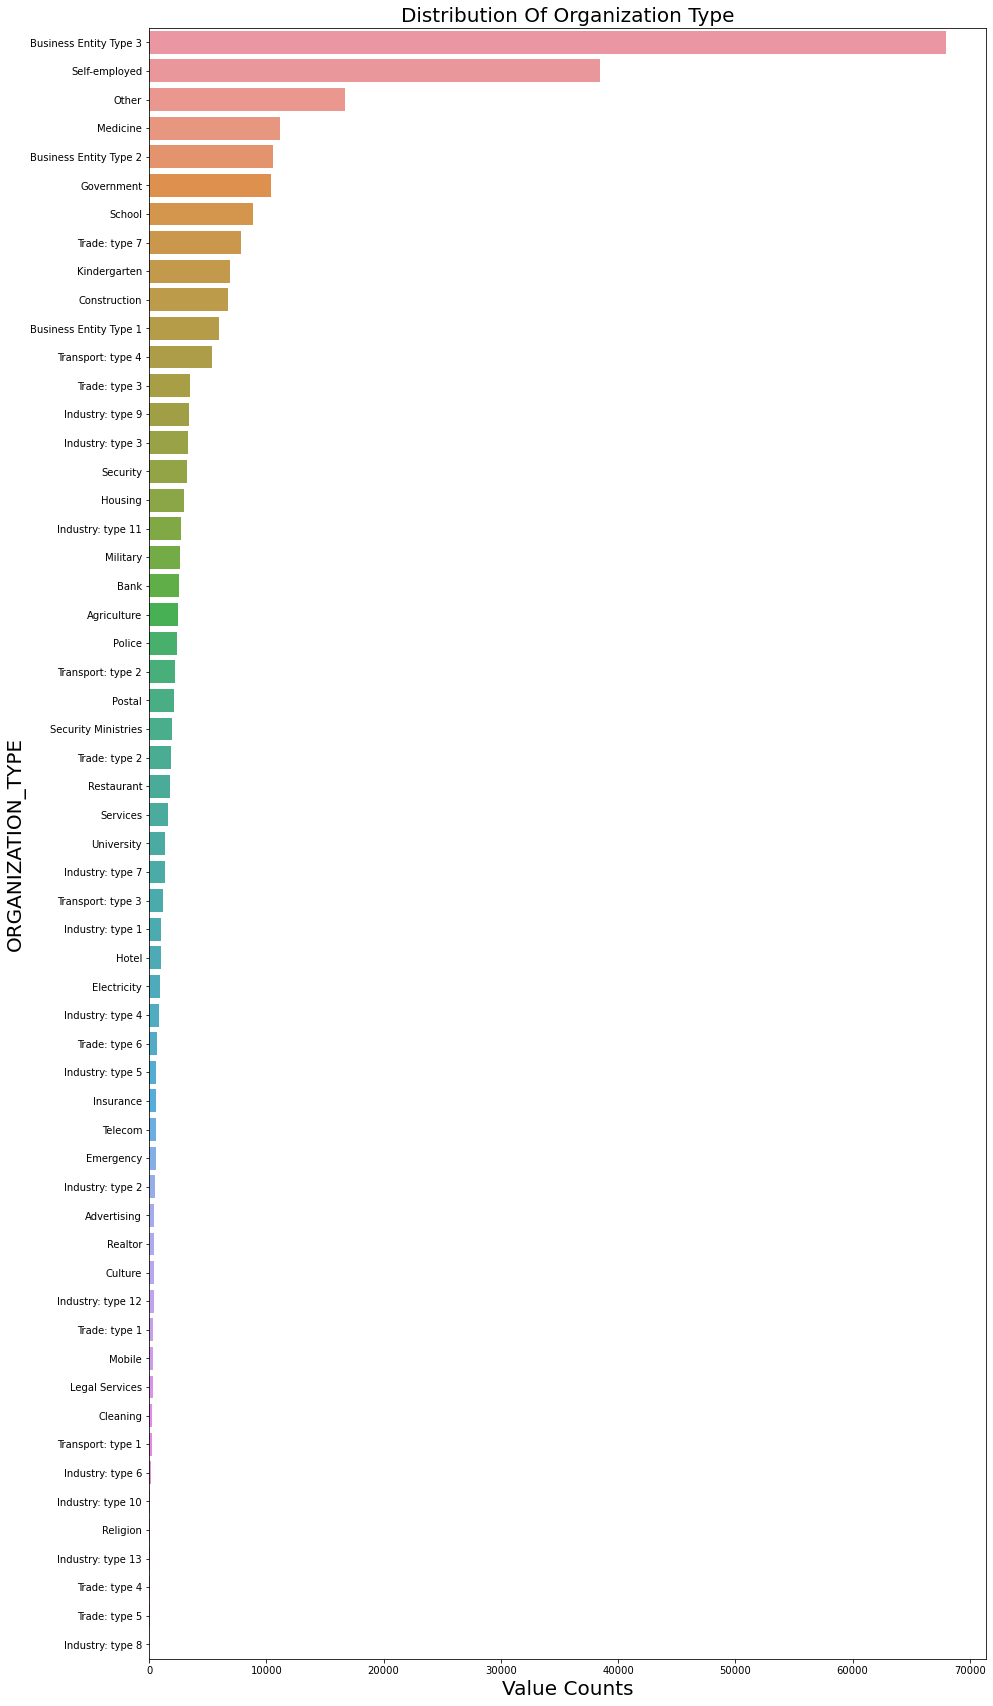

In [36]:
# plotting Distribution of Organization Type
plt.figure(figsize=(15, 30))

catplot(ap_d, "Distribution Of Organization Type", "ORGANIZATION_TYPE")
plt.show()

**Points of Observation**
- The Business Entity Type3 and Self-employed forms the majority of the clients who have applied for loan.
- There are very less client from Industry types (6, 10, 13 and 8), Religion, and Trade types(4 and 5).

#### Analysing CODE_GENDER column

In [37]:
# listing the values and their corresponding frequencies of the column
ap_d.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Clearly, the 4 values corresponding to the value XNA should be treated as null values and then, get treated as missing values.

In [38]:
# replacing the XNA value with nan values
ap_d.CODE_GENDER = ap_d.CODE_GENDER.replace("XNA", np.nan)
ap_d.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

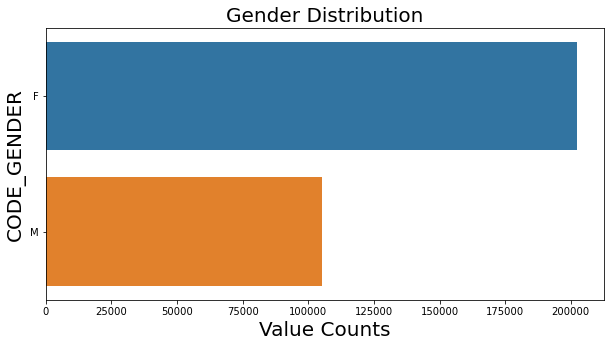

In [39]:
# plotting gender distribution
plt.figure(figsize=(10, 5))
catplot(ap_d, "Gender Distribution", "CODE_GENDER")

**Points of Conclusion**
-  Females forms the majority of the clients who have applied for loans.
-  Males are almost half the population of females

#### Analysing NAME_FAMILY_STATUS column

In [40]:
# listing the values and their corresponding frequencies of the column
ap_d.NAME_FAMILY_STATUS.value_counts()

Married           196432
Single             45444
Civil marriage     29775
Separated          19770
Widow              16088
Name: NAME_FAMILY_STATUS, dtype: int64

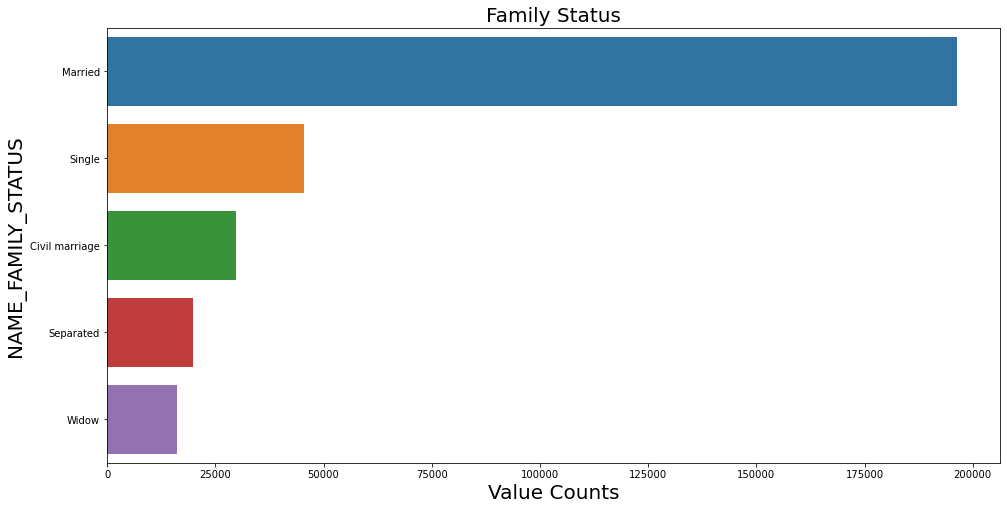

In [41]:
# plotting the family status counts
plt.figure(figsize=(16, 8))
catplot(ap_d, "Family Status", "NAME_FAMILY_STATUS")

**Points of conclusion**
- Majority of clients are Married.
- Widow form the least composition of the population.

### Missing Value Treatment

In [42]:
ap_d[categorical_columns_list].isnull().sum()

FLAG_OWN_CAR               0
OCCUPATION_TYPE        96391
NAME_FAMILY_STATUS         2
NAME_CONTRACT_TYPE         0
FLAG_OWN_REALTY            0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
ORGANIZATION_TYPE      55374
CODE_GENDER                4
dtype: int64

In [43]:
(ap_d[categorical_columns_list].isnull().sum()/ap_d[categorical_columns_list].shape[0])*100

FLAG_OWN_CAR            0.000000
OCCUPATION_TYPE        31.345545
NAME_FAMILY_STATUS      0.000650
NAME_CONTRACT_TYPE      0.000000
FLAG_OWN_REALTY         0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
ORGANIZATION_TYPE      18.007161
CODE_GENDER             0.001301
dtype: float64

**Conclusions**
- The OCCUPATION_TYPE column has 96391 null values. (approximately 31%)
- The ORGANIZATION_TYPE column has 55374 null values. (approximately 18%)
- The columns NAME_FAMILY_STATUS and NAME_INCOME_TYPE have very less null values, 2 and 4 respectively.

#### Proposed solution
- The rows containing null values in the NAME_FAMILY_STATUS AND NAME_INCOME_TYPE are very less and if deleted, they won't impact the dataset very much. Therefore, I suggest to delete these rows.
- The OCCUPATION_TYPE column should not be imputed with any of the existing values as this would add huge misinformation. Also, I would not opt to delete these rows as this would mean that a huge amount of data would be lost. Rather, I propose another value named 'Missing' which would replace the null values of this column. 
- The ORGANIZATION_TYPE column also has a huge amount of null values. I would notlike to delete these rows for the same reason that, it would result in the loss of a lot of information. Further, I would not suggest to impute it with any of the existing values as this would add misinformation and would result in erroneous analysis. Therefore, I would like to propose another value named "Missing" which would replace the null values of this column.

# Numerical Variables

In [44]:
numerical_columns_list

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

#### Comment on SK_ID_CURR column in the dataset
-  Here, we would ignore SK_ID_CURR column for the numerical analysis. It does not add much information to our analysis as it is an identifier for the loans. But, this would serve as an important column when we carry out merge with the previous_application data in the last part of our analysis. 
-  This is the only column which is common between the two dataset as is evident from the data dictionary and the dataset itself.

#### Missing Value Treatment

In [45]:
ap_d[numerical_columns_list].isnull().sum()

SK_ID_CURR                      0
TARGET                          0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
AMT_GOODS_PRICE               278
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
EXT_SOURCE_2                  660
EXT_SOURCE_3                60965
OBS_30_CNT_SOCIAL_CIRCLE     1021
DEF_30_CNT_SOCIAL_CIRCLE     1021
OBS_60_CNT_SOCIAL_CIRCLE     1021
DEF_60_CNT_SOCIAL_CIRCLE     1021
dtype: int64

In [46]:
(ap_d[numerical_columns_list].isnull().sum()/ap_d[numerical_columns_list].shape[0])*100

SK_ID_CURR                   0.000000
TARGET                       0.000000
CNT_CHILDREN                 0.000000
AMT_INCOME_TOTAL             0.000000
AMT_CREDIT                   0.000000
AMT_ANNUITY                  0.003902
AMT_GOODS_PRICE              0.090403
DAYS_BIRTH                   0.000000
DAYS_EMPLOYED                0.000000
CNT_FAM_MEMBERS              0.000650
REGION_RATING_CLIENT         0.000000
EXT_SOURCE_2                 0.214626
EXT_SOURCE_3                19.825307
OBS_30_CNT_SOCIAL_CIRCLE     0.332021
DEF_30_CNT_SOCIAL_CIRCLE     0.332021
OBS_60_CNT_SOCIAL_CIRCLE     0.332021
DEF_60_CNT_SOCIAL_CIRCLE     0.332021
dtype: float64

**Conclusion**
- The columns AMT_ANNUITY, AMT_GOODS_PRICE, CNT_FAM_MEMBERS, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE,  OBS_60_CNT_SOCIAL_CIRCLE, and DEF_60_CNT_SOCIAL_CIRCLE have a small percentage of null values.
- The column EXT_SOURCE_3 has a considerable percentage of null values.

**Proposed Solution**
-  The null values contained in the columns AMT_ANNUITY should be dropped as they form a very tiny portion of the dataset.
-  The rows containing null values in the OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, and DEF_60_CNT_SOCIAL_CIRCLE should be dropped.
-  The null_values in the columns EXT_SOURCE_2 and EXT_SOURCE_3 should be imputed with zero as it is a rating column and we don't have any rating for such applicants.
-  The null values in the column cNT_FAM_MEMBERS should be replaced with the median value of the column as it is safe to assume that the missing consists of the most frequent value.

## Conclusion and Plots for Numerical Columns

#### Custom functions for plot of numerical columns

In [47]:
# Function-1 plotting boxplots for the numerical columns 
def numplot(data, title, col):
    fontdict ={'fontsize': 20, 'fontweight': 5}
    plt.title(title, fontdict)
    sns.set_style("darkgrid")
    sns.set_context("talk")
    sns.boxplot(data = data, x=col)
    plt.xlabel(col, fontdict)
    
# Function-2 plotting boxplots for the numerical columns, but the scale is converted to logarithmic.
def numlogplot(data, title, col):
    fontdict ={'fontsize': 20, 'fontweight': 5}
    plt.title(title, fontdict)
    sns.set_style("darkgrid")
    sns.set_context("talk")
    plt.xscale('log')
    sns.boxplot(data =data, x= col)
    plt.xlabel(col, fontdict)
    

#### Analysing CNT_CHILDREN column

In [48]:
# Describing the columns
ap_d.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

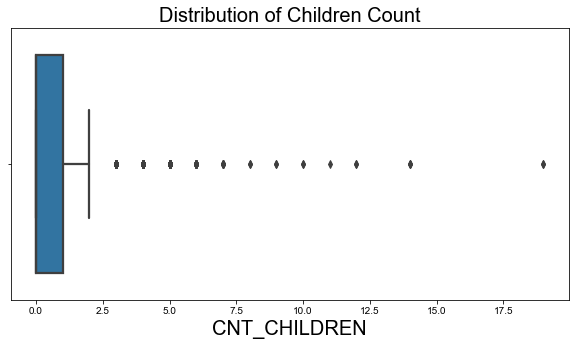

In [49]:
# Using the custom function to plot the Distribution of Children Count
plt.figure(figsize=(10, 5))
numplot(ap_d, "Distribution of Children Count", "CNT_CHILDREN")
plt.show()

In [50]:
# values corresponding to the percentiles
ap_d.CNT_CHILDREN.quantile([0.95, 0.99, 0.997])

0.950    2.0
0.990    3.0
0.997    3.0
Name: CNT_CHILDREN, dtype: float64

**Conclusions and proposed solution**
-  Most of the clients are having child.
-  A very tiny portion do not have any child.
-  There are some clear outliers in the dataset.
-  I suggest that the values above the 99.7th percentile should be capped with the 99.7th percentile values.

#### Analysing AMT_INCOME_TOTAL

In [51]:
# Describing the columns
ap_d.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

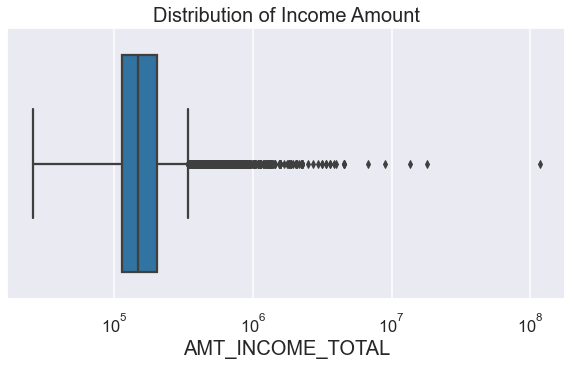

In [52]:
# The variable contains some huge values and hence, it is good to analyze it using logarithmic scale.
# Using custom function to plot the variable.
plt.figure(figsize=(10, 5))
numlogplot(ap_d, "Distribution of Income Amount", "AMT_INCOME_TOTAL")
plt.show()

In [53]:
# values for the corresponding percentiles
ap_d.AMT_INCOME_TOTAL.quantile([0.95, 0.97, 0.995])

0.950    337500.0
0.970    382500.0
0.995    630000.0
Name: AMT_INCOME_TOTAL, dtype: float64

**Conclusion and Proposed Solution**
-  The data distribution clearly show that the body of the boxplot is very thin. 
-  There are some outliers in the data. Although most outliers are acceptable.
-  I suggest that the values above the 97th percentile level should be dropped.

#### Analysing AMT_CREDIT column

In [54]:
# describing the column
ap_d.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

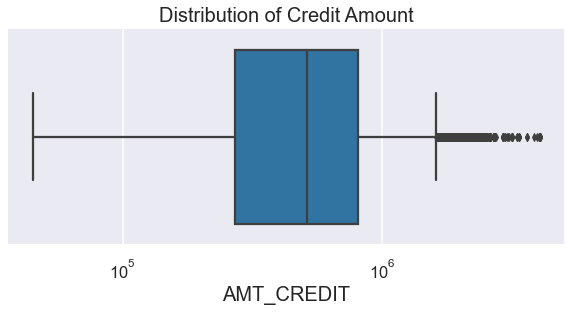

In [55]:
# plotting the distribution of credit amount
plt.figure(figsize=(10, 4))
numlogplot(ap_d, "Distribution of Credit Amount", "AMT_CREDIT")
plt.show()

In [56]:
# values corresponding to the percentiles
ap_d.AMT_CREDIT.quantile([0.95, 0.99, 0.995, 0.9995])

0.9500    1350000.0
0.9900    1854000.0
0.9950    2022565.5
0.9995    2517300.0
Name: AMT_CREDIT, dtype: float64

**Conclusion and Proposed solution**
- The columns clearly contains some data points which can be considered as outliers. However, as clearly evident from the analysis. The data points are gradually increasing with some exceptions towards the end.
- The values above 99.95th percentile are clear outliers
- These end points should be dropped out of the analysis.  

#### Analysing AMT_ANNUITY column

In [57]:
# Analysing the column
ap_d.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

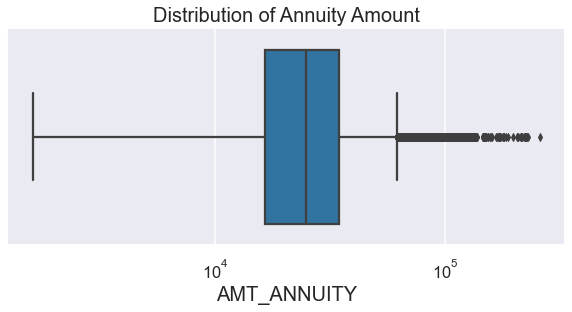

In [58]:
# plotting the Distribution of Annuity Amount
plt.figure(figsize=(10, 4))
numlogplot(ap_d, "Distribution of Annuity Amount", "AMT_ANNUITY")
plt.show()

In [59]:
ap_d.AMT_ANNUITY.quantile([0.95, 0.99])

0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

**Conclusions and Proposed Solution**
-  Most client have annuity amount in the first quantile.
-  The column contains outliers which are clearly evident. However, there are many outliers which are increasingly uniformly and hence, should be made part of the analysis.
-  However, the data above 99th percentile shoots to a high value.
-  I therefore, suggest to drop these outliers.

# Target Variable -  Imbalance Ratio

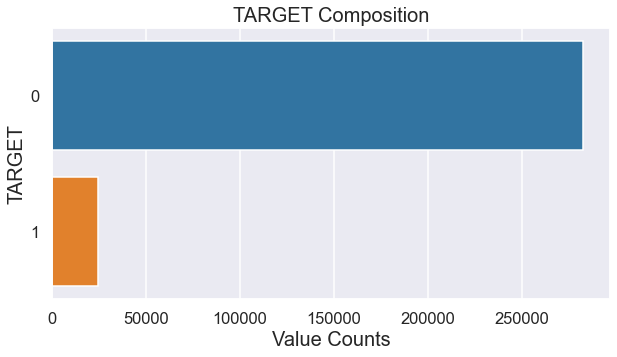

In [60]:
# plotting the composition of Target Variable.
# 1- facing difficulties in payment
# 0 - all other categories.
plt.figure(figsize=(10, 5))
catplot(data = ap_d, column = "TARGET", title = "TARGET Composition")
plt.show()

#### Observation
- Most of the clients belong to the Target 0 category.

In [61]:
Target_df = pd.DataFrame(ap_d.TARGET.value_counts())

In [62]:
Target_df

,TARGET
0,282686
1,24825


In [63]:
Imbalance_ratio = Target_df.loc[0]/Target_df.loc[1]

In [64]:
print("The imbalance ratio is:", round(Imbalance_ratio[0], 2))

The imbalance ratio is: 11.39


**Imbalance ratio is 11.39.**

# Some other derived metric

#### Creating bins and labels for AMT_INCOME_TOTAL
-  For this, we would first analyze the variable and different quantiles.

In [65]:
# Describing the columns
ap_d.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [66]:
# values corresponding to the percentiles
ap_d.AMT_INCOME_TOTAL.quantile([0.80, 0.90, 0.95, 0.99, 0.995])

0.800    225000.0
0.900    270000.0
0.950    337500.0
0.990    472500.0
0.995    630000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [67]:
# Creating bins and the labels
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000, 300000, 
        325000, 350000, 375000, 400000, 425000, 450000, 475000, 500000, 999999999]
levels = ['0-25000', '25000-50000', '50000-75000', '75000-100000', 
          '100000-125000', '125000-150000', '150000-175000', '175000-200000', 
          '200000-225000', '225000-250000', '250000-275000', '275000-300000', 
          '300000-325000', '325000-350000', '350000-375000', '375000-400000', 
          '400000-425000', '425000-450000', '450000-475000', '475000-500000', '500000 and above']
ap_d["AMT_INCOME_GROUPS"] = pd.cut(ap_d["AMT_INCOME_TOTAL"], bins, labels=levels)

In [68]:
# Checking the output
ap_d["AMT_INCOME_GROUPS"]

0         200000-225000
1         250000-275000
2           50000-75000
3         125000-150000
4         100000-125000
              ...      
307506    150000-175000
307507      50000-75000
307508    150000-175000
307509    150000-175000
307510    150000-175000
Name: AMT_INCOME_GROUPS, Length: 307511, dtype: category
Categories (21, object): ['0-25000' < '25000-50000' < '50000-75000' < '75000-100000' ... '425000-450000' < '450000-475000' < '475000-500000' < '500000 and above']

#### Creating bins and labels for AMT_CREDIT 
-  For this, we would first analyse this variables and different quantiles.

In [69]:
# Describing the column
ap_d.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [70]:
# values and the correspoding percentiles
ap_d.AMT_CREDIT.quantile([0.05, 0.10, 0.20, 0.80, 0.85, 0.90, 0.95, 0.99])

0.05     135000.0
0.10     180000.0
0.20     254700.0
0.80     900000.0
0.85    1024740.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [71]:
# as per the observation above, we are making the bins as follows.
bins = [0, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 
        550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, 950000, 1000000, 99999999999]
levels = ['0-150000', '150000-200000', '200000-250000', '250000-300000','300000-350000', '350000-400000','400000-450000', 
          '450000-500000','500000-550000', '550000-600000','600000-650000', '650000-700000',
          '700000-750000', '750000-800000', '800000-850000', '850000-900000', '900000-950000', '950000-1000000', 
          '1000000 and above']
ap_d["AMT_CREDIT_GROUPS"] = pd.cut(ap_d["AMT_CREDIT"], bins, labels = levels)

In [72]:
# Checking the output
ap_d["AMT_CREDIT_GROUPS"]

0             400000-450000
1         1000000 and above
2                  0-150000
3             300000-350000
4             500000-550000
                ...        
307506        250000-300000
307507        250000-300000
307508        650000-700000
307509        350000-400000
307510        650000-700000
Name: AMT_CREDIT_GROUPS, Length: 307511, dtype: category
Categories (19, object): ['0-150000' < '150000-200000' < '200000-250000' < '250000-300000' ... '850000-900000' < '900000-950000' < '950000-1000000' < '1000000 and above']

#### Custom functions

In [73]:
# Custom Function
def catplotx(data, title, col):
    fontdict= {'fontsize':30 , 'fontweight': 5}
    sns.countplot(data= data, x=col, order=data[col].value_counts().index)
    plt.xticks(rotation=45)
    #sns.set_style("darkgrid")
    #sns.set_context("talk")
    plt.title(title, fontdict)
    plt.xlabel(col, fontdict)
    plt.ylabel("Value Counts", fontdict)

In [74]:
# Custom Function - introducing feature hue
def catplotx1(data, title, col):
    fontdict= {'fontsize':30 , 'fontweight': 5}
    sns.countplot(data= data, x=col, order=data[col].value_counts().index, hue="CODE_GENDER")
    plt.xticks(rotation=45)
    #sns.set_style("darkgrid")
    #sns.set_context("talk")
    plt.title(title, fontdict)
    plt.xlabel(col, fontdict)
    plt.ylabel("Value Counts", fontdict)

# Segmented Univariate Analysis

Here, we would divide the dataframe into two based on Target column -
-  Target = 1 (Client with payment difficulties)
-  Target = 0 (all others)

In [75]:
# Segmenting the dataframe into two sub-dataframes
target_1_df = ap_d[ap_d["TARGET"] == 1]
target_0_df = ap_d[ap_d["TARGET"] == 0]

In [76]:
# dataframe with target = 1
target_1_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_INCOME_GROUPS,AMT_CREDIT_GROUPS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary,Single,9461,637,Laborers,1.0,2,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,200000-225000,400000-450000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary,Widow,18724,2628,Cooking staff,1.0,3,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,100000-125000,950000-1000000
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary,Married,17482,1262,Laborers,2.0,2,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,200000-225000,1000000 and above
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary,Civil marriage,13384,3597,Sales staff,2.0,3,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,125000-150000,250000-300000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary,Married,24794,365243,NaN,2.0,2,NaN,0.023952,0.720944,1.0,1.0,1.0,1.0,75000-100000,250000-300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,450000.0,Working,Secondary,Married,9918,3048,Laborers,3.0,3,Business Entity Type 3,0.329708,0.360613,0.0,0.0,0.0,0.0,200000-225000,400000-450000
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,1125000.0,Working,Higher education,Civil marriage,13416,2405,Laborers,3.0,2,Construction,0.583214,0.424130,0.0,0.0,0.0,0.0,125000-150000,1000000 and above
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,297000.0,Working,Secondary,Married,20644,3147,Managers,2.0,2,Business Entity Type 3,0.713524,0.511892,0.0,0.0,0.0,0.0,200000-225000,250000-300000
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,450000.0,Commercial associate,Secondary,Civil marriage,16471,286,Sales staff,2.0,2,Business Entity Type 3,0.615261,0.397946,1.0,1.0,1.0,0.0,200000-225000,500000-550000


In [77]:
# dataframe with target = 0
target_0_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_INCOME_GROUPS,AMT_CREDIT_GROUPS
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,16765,1188,Core staff,2.0,1,School,0.622246,NaN,1.0,0.0,1.0,0.0,250000-275000,1000000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary,Single,19046,225,Laborers,1.0,2,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary,Civil marriage,19005,3039,Laborers,2.0,2,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary,Single,19932,3038,Core staff,1.0,2,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,100000-125000,500000-550000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary,Married,16941,1588,Laborers,2.0,2,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,75000-100000,450000-500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,225000.0,Pensioner,Secondary,Single,24384,365243,NaN,1.0,2,NaN,0.346391,0.742182,0.0,0.0,0.0,0.0,100000-125000,200000-250000
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary,Separated,9327,236,Sales staff,1.0,1,Services,0.681632,NaN,0.0,0.0,0.0,0.0,150000-175000,250000-300000
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary,Widow,20775,365243,NaN,1.0,2,NaN,0.115992,NaN,0.0,0.0,0.0,0.0,50000-75000,250000-300000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,14966,7921,Managers,1.0,3,School,0.535722,0.218859,6.0,0.0,6.0,0.0,150000-175000,650000-700000


### Analysing the derived metric - AMT_CREDIT_GROUPS for Target 0 and Target 1

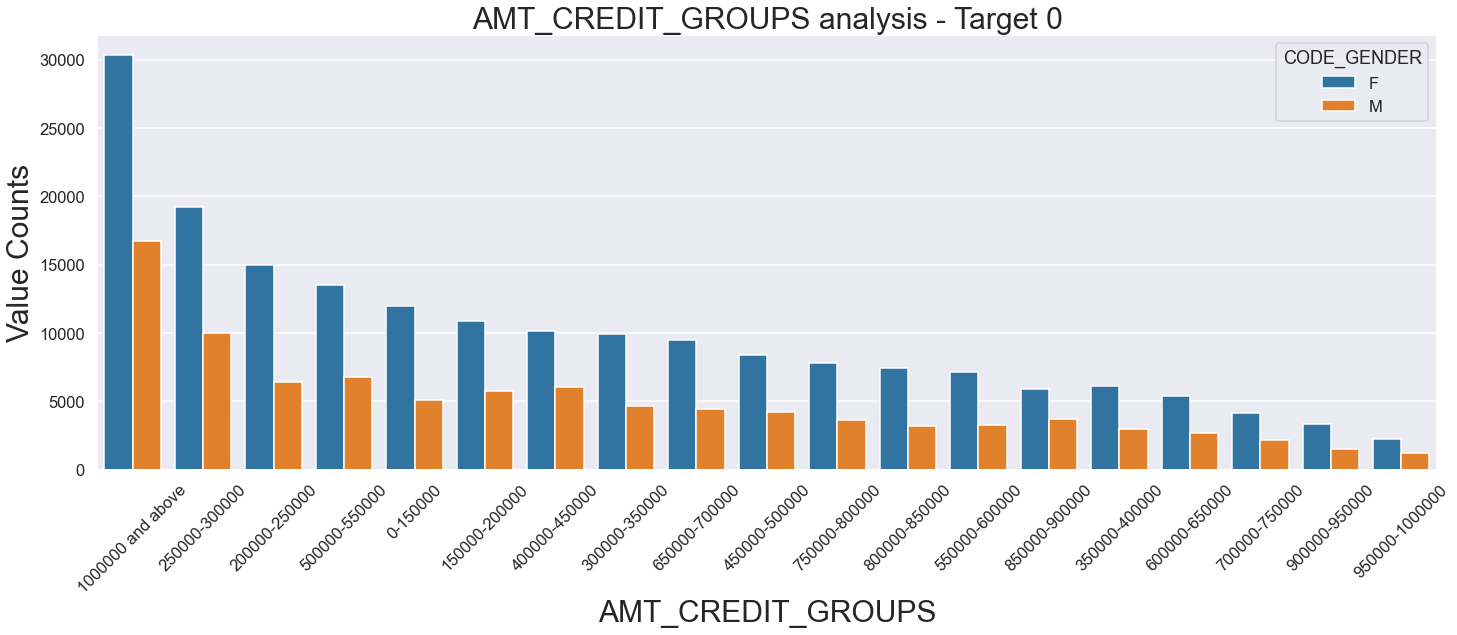

In [78]:
# plotting derived metric for target = 0
plt.figure(figsize=(24, 8))
catplotx1(target_0_df, "AMT_CREDIT_GROUPS analysis - Target 0", "AMT_CREDIT_GROUPS")
plt.show()

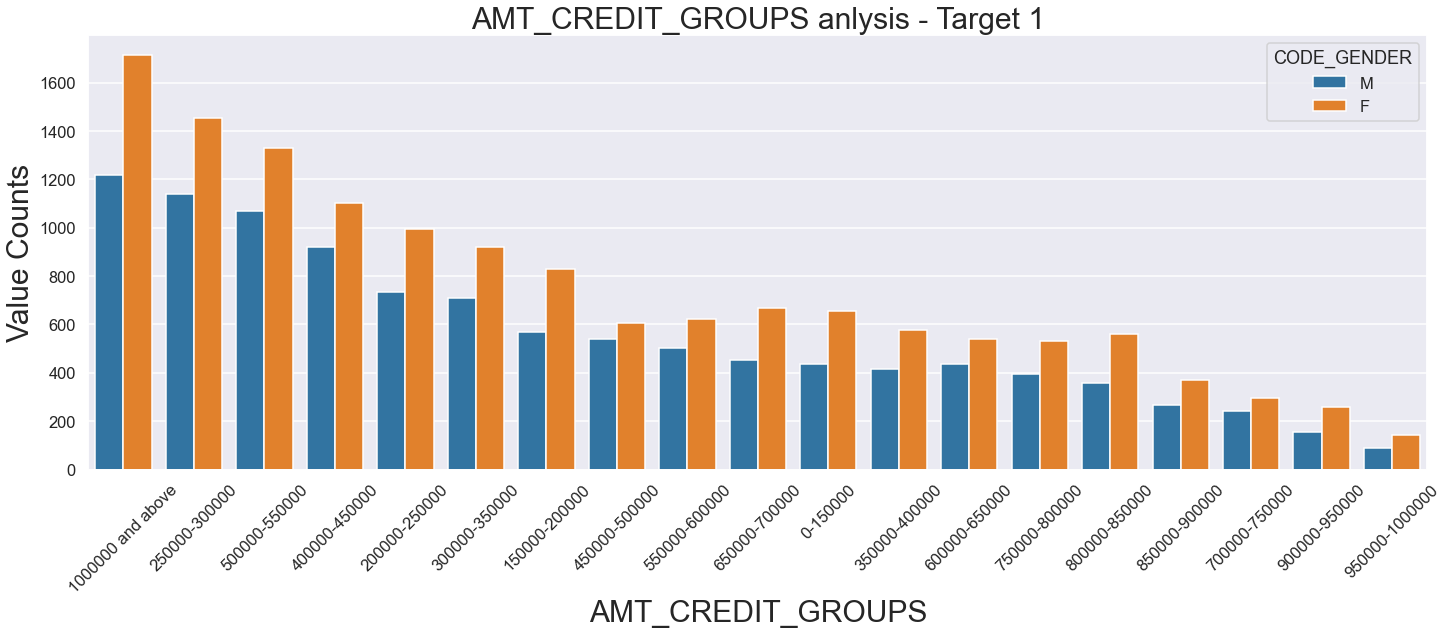

In [79]:
# plotting derived metric for target = 1
plt.figure(figsize=(24, 8))
catplotx1(target_1_df, "AMT_CREDIT_GROUPS anlysis - Target 1", "AMT_CREDIT_GROUPS")
plt.show()

#### Observations
-  Number of Females is higher than the number of males.
-  The levels between 100000 and 200000 have more credits.
-  For most categories, females are dominant.
-  Very few belong to the 450000 to 500000 categories.

### Analysing the derived metric - AMT_INCOME_GROUPS for Target 0 and Target 1

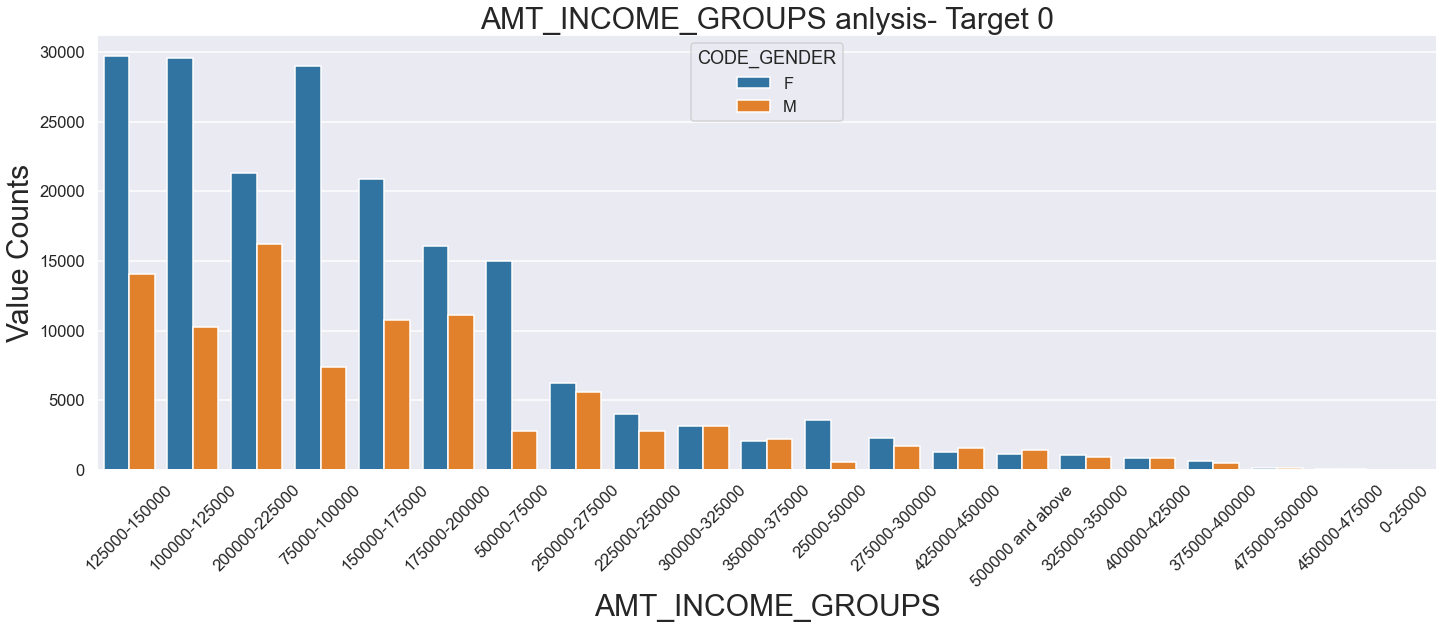

In [80]:
# plotting derived metric for target = 0
plt.figure(figsize=(24, 8))
catplotx1(target_0_df, "AMT_INCOME_GROUPS anlysis- Target 0", "AMT_INCOME_GROUPS")
plt.show()

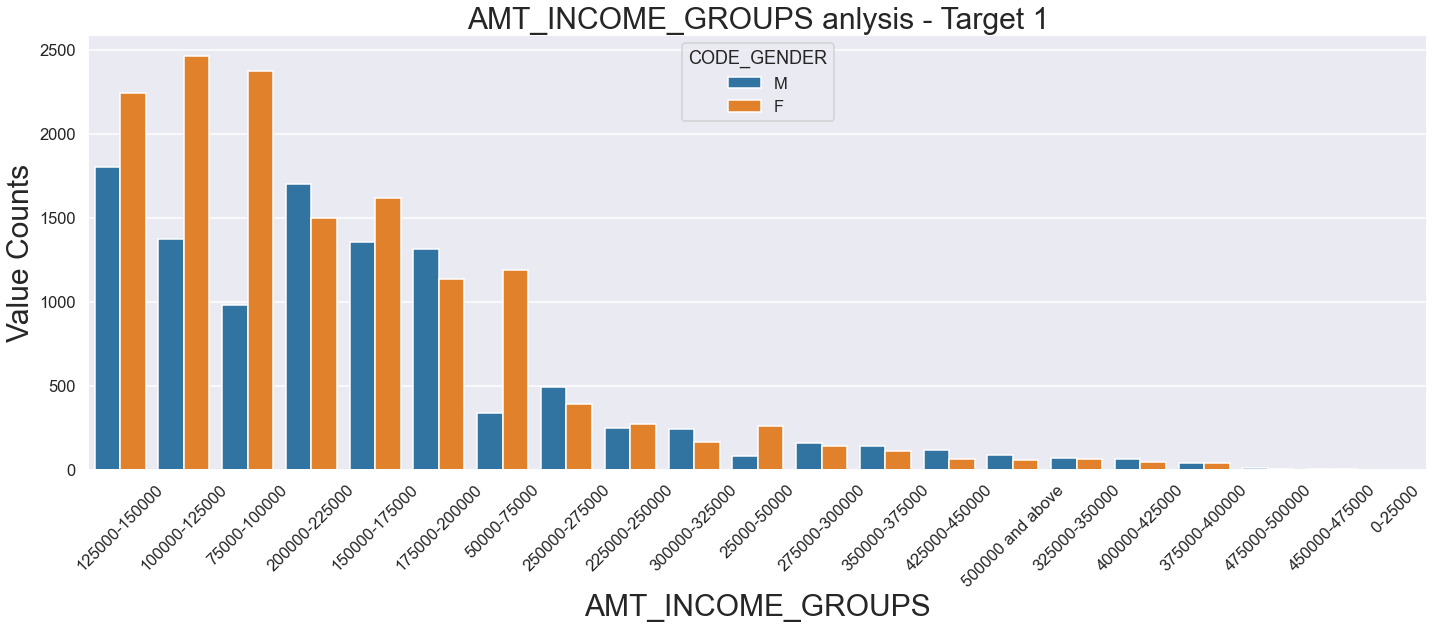

In [81]:
# plotting derived metric for target = 1
plt.figure(figsize=(24, 8))
catplotx1(target_1_df, "AMT_INCOME_GROUPS anlysis - Target 1", "AMT_INCOME_GROUPS")
plt.show()

#### Observations
- Number of females hgiher than the number of males.
- For most categories, females are dominant.
- Target = 0: 
      Females highest in 100000 - 125000
      Males highest in 200000 - 225000 
- Target = 1:     
      Females highest in 125000 - 150000
      Males highest in 125000 - 250000
      

### Categorical Columns

#### Analysing CODE_GENDER

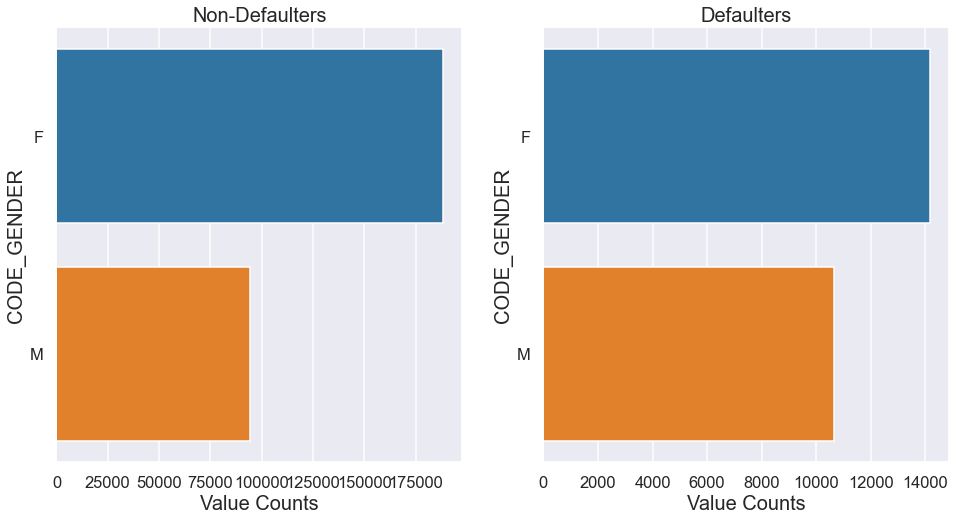

In [82]:
# Plotting the column for both target = 0 and target = 1
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
catplot(target_0_df, "Non-Defaulters", "CODE_GENDER")

plt.subplot(1,2,2)
catplot(target_1_df, "Defaulters", "CODE_GENDER")

**Conclusions**
- In both the categories, Females dominate.
- However, the proportion of males in the defaulters category increased significantly in comparison to the non-defaulter category. This suggests that males are likely to default more than females.

#### Analysing NAME_FAMILY_STATUS

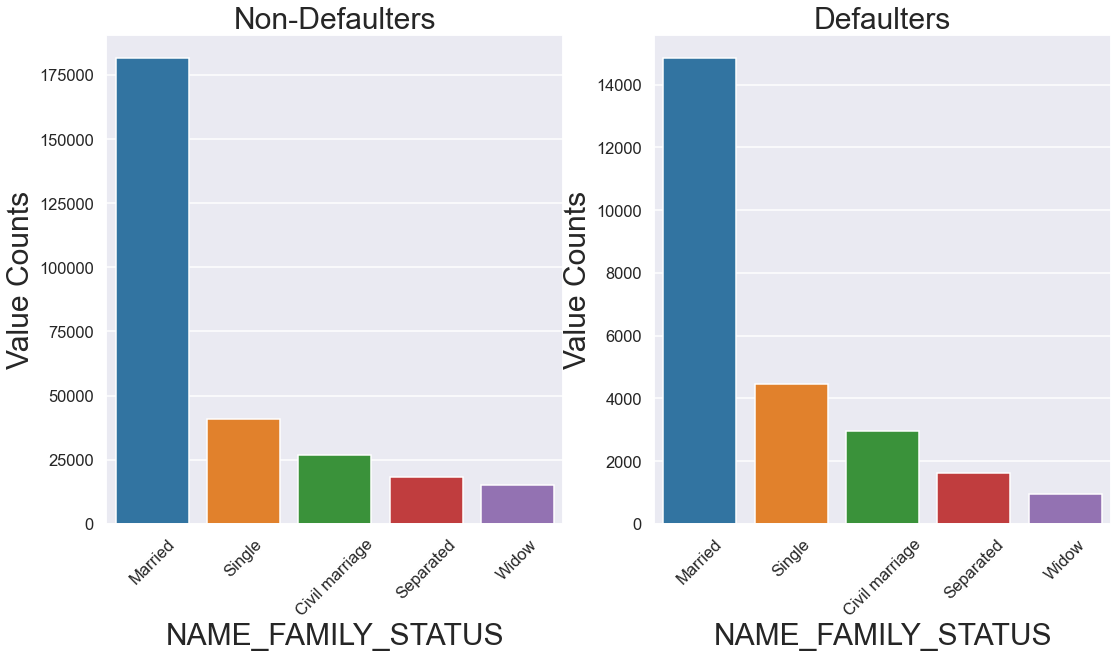

In [83]:
# plotting the column for both target = 0 and target =1
plt.figure(figsize=(18, 9))
plt.subplot(1,2,1)
catplotx(target_0_df, "Non-Defaulters", "NAME_FAMILY_STATUS")

plt.subplot(1,2,2)
catplotx(target_1_df, "Defaulters", "NAME_FAMILY_STATUS")
plt.show()

**Conclusion**
- The married people are more likely to apply for loans.
- However, the marital status is not a very reliable factor for deciding on the defaulters.

#### Analysing NAME_CONTRACT_TYPE column

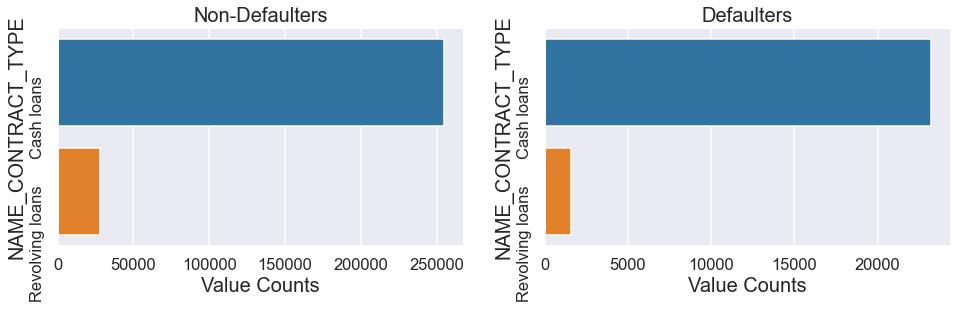

In [84]:
# plotting the column for both target = 0 and target =1
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
catplot(target_0_df, "Non-Defaulters", "NAME_CONTRACT_TYPE")
plt.yticks(rotation=90)

plt.subplot(1,2,2)
catplot(target_1_df, "Defaulters", "NAME_CONTRACT_TYPE")
plt.yticks(rotation=90)
plt.show()

**Conclusions**
-  In both the categories, Cash loans dominates.
-  However, the percentage composition of Revolving loans in Defaulters is less as compared to its composition in the non-defaulters. This suggests that Revolving loan applicants are less likely to default.

#### Analysing NAME_INCOME_TYPE column

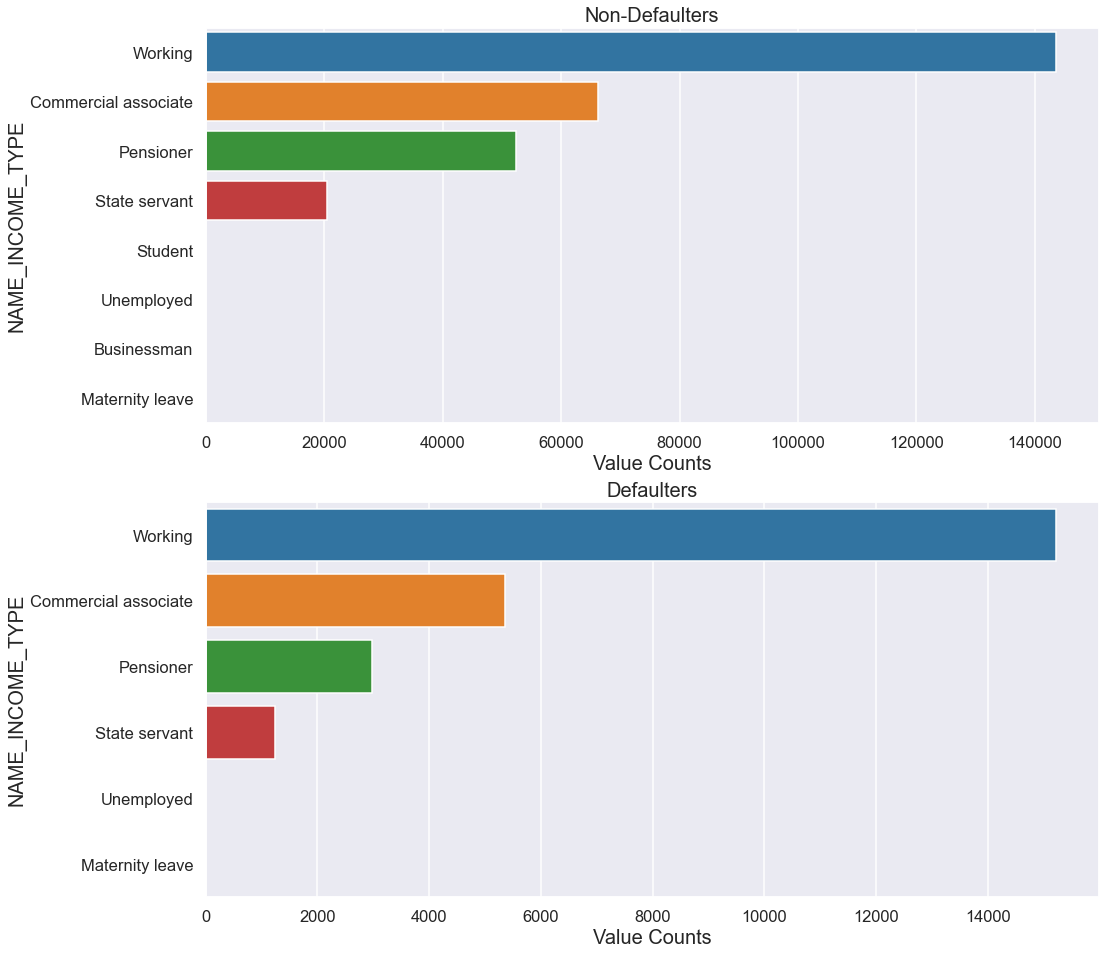

In [85]:
# plotting the column for both target = 0 and target =1
plt.figure(figsize=(16, 16))
plt.subplot(2,1,1)
catplot(target_0_df, "Non-Defaulters", "NAME_INCOME_TYPE")

plt.subplot(2,1,2)
catplot(target_1_df, "Defaulters", "NAME_INCOME_TYPE")
plt.show()

**Conclusions**
-  The defaulter and non-defaulter group both consist of the income types: Working, Commercial associate,  Pensioner, State servant, Unemployed and Maternity leave 
-  None of the defaulters are Businessman or Student.

**Analysing the AMT_CREDIT_GROUPS**

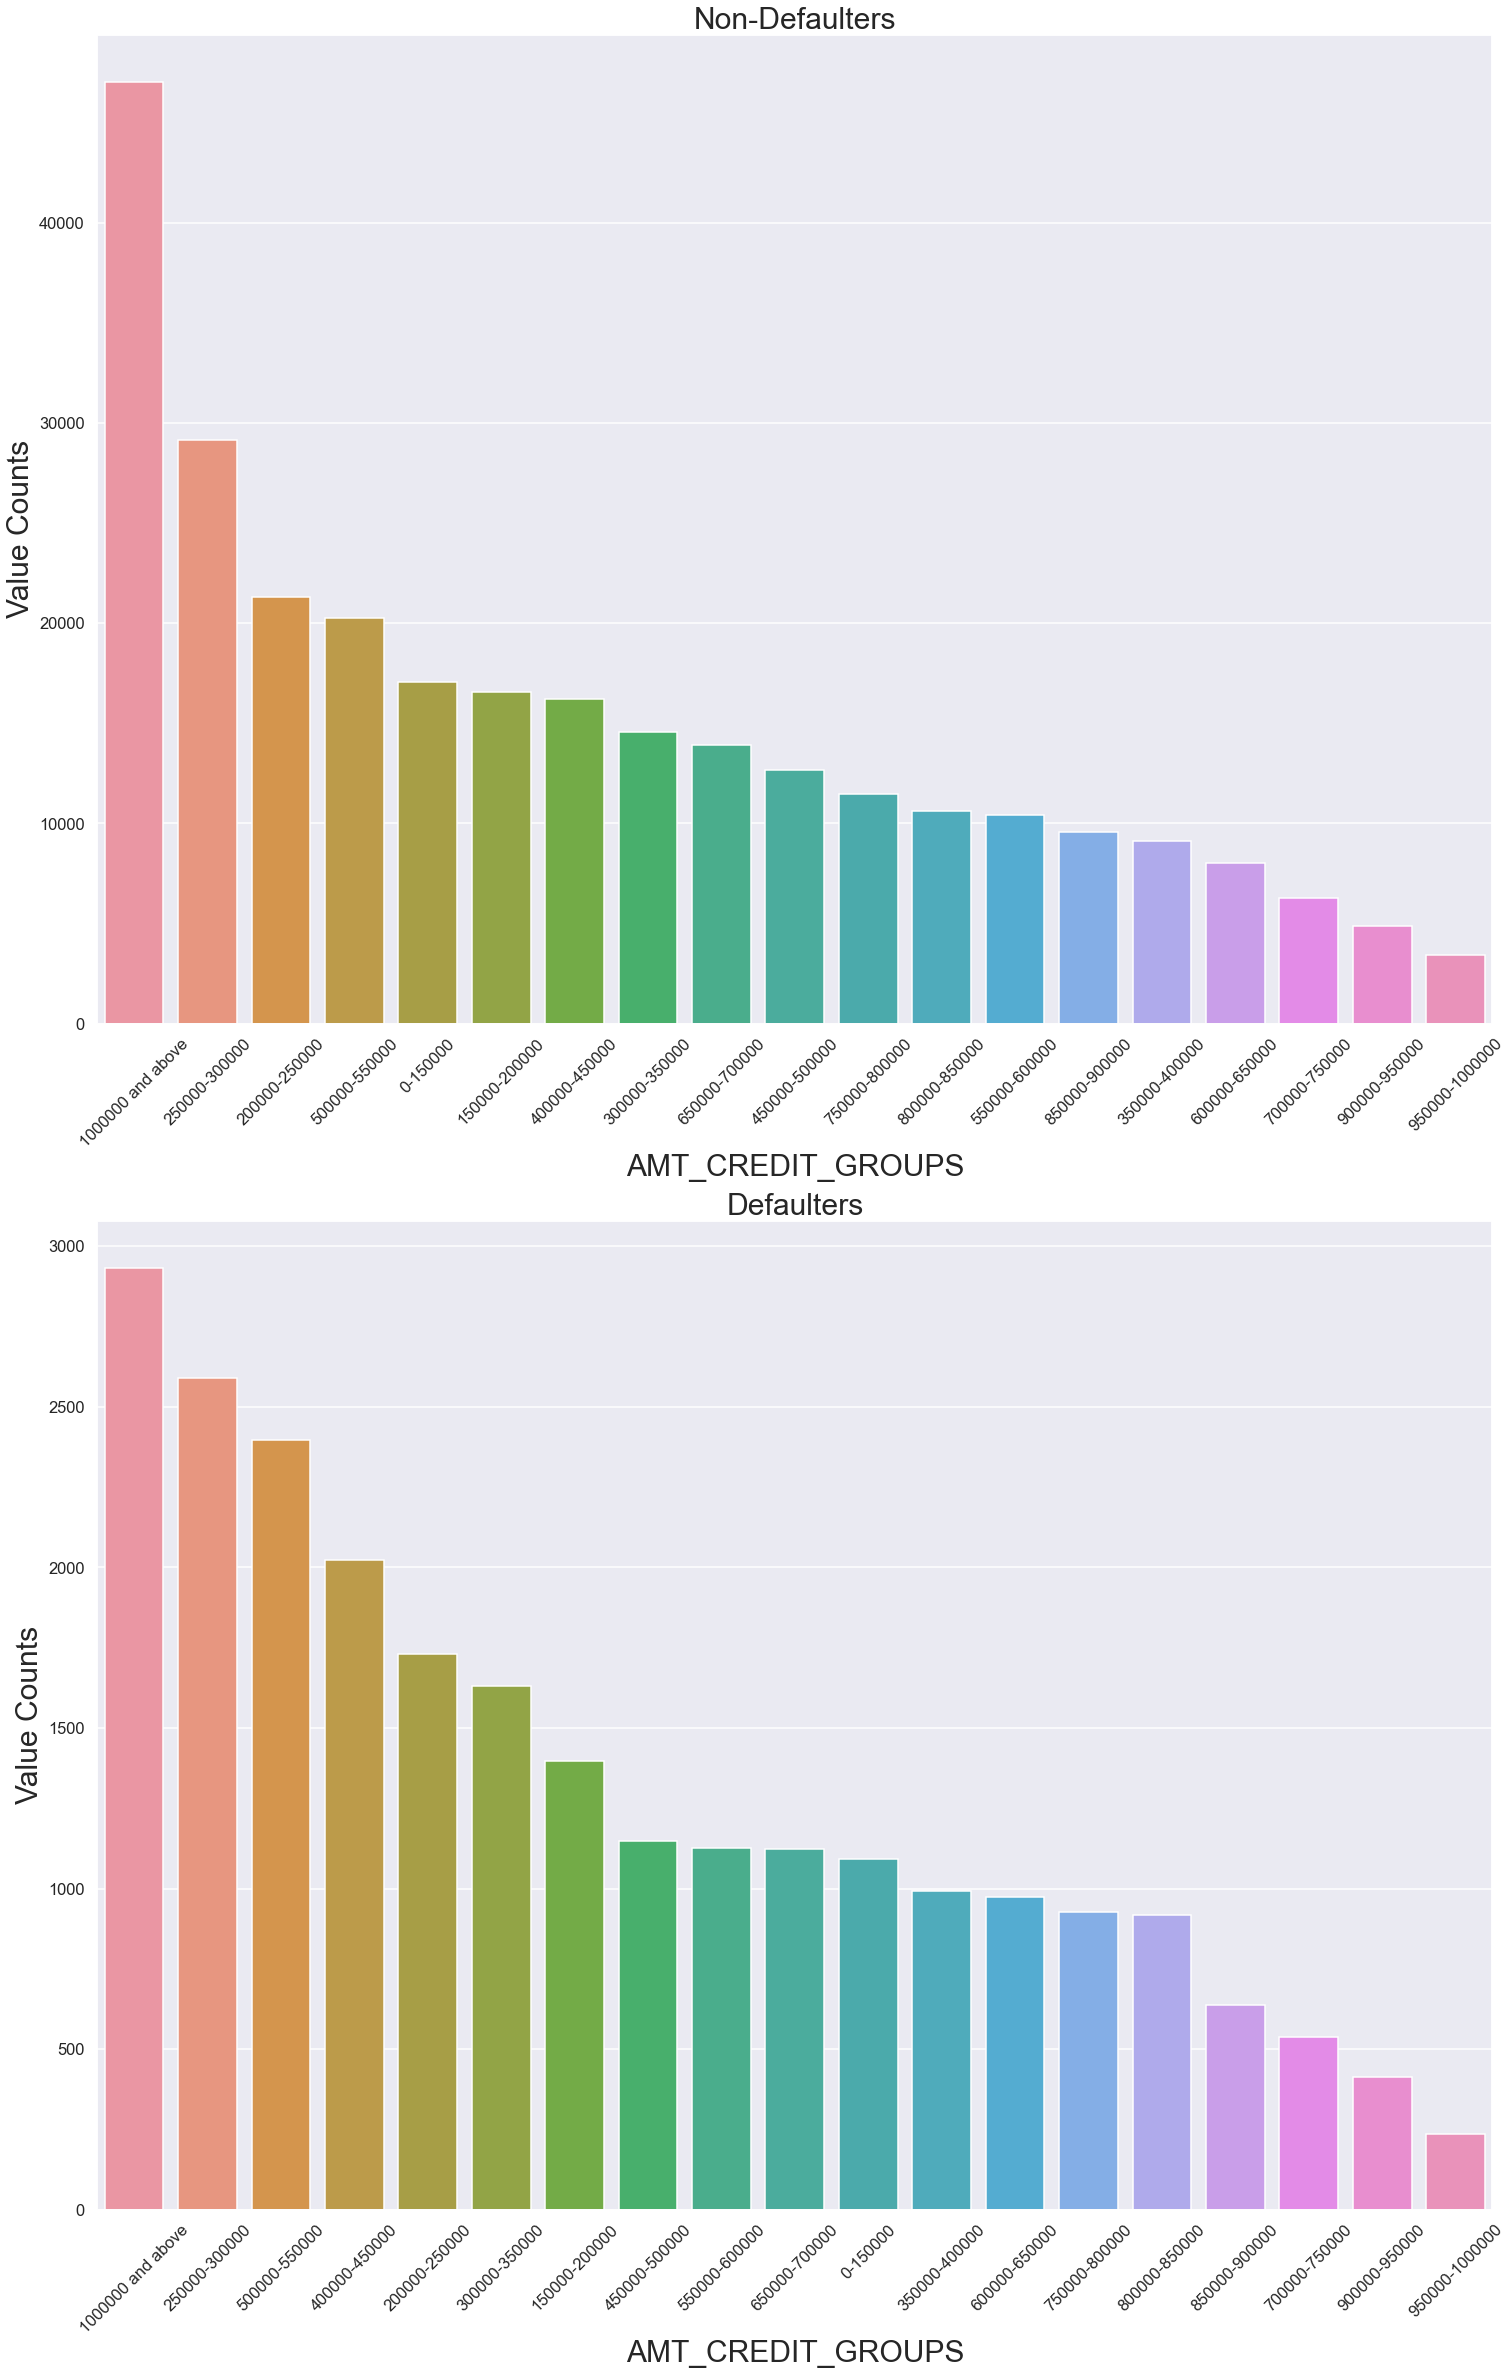

In [86]:
# plotting the column for both target = 0 and target =1
plt.figure(figsize=(25, 40))
plt.subplot(2,1,1)
catplotx(target_0_df, "Non-Defaulters", "AMT_CREDIT_GROUPS")

plt.subplot(2,1,2)
catplotx(target_1_df, "Defaulters", "AMT_CREDIT_GROUPS")
plt.show()

**Conclusions**
-  The groups 0-150000, 200000-250000, 650000-700000, 850000-900000 are more likely to default.
-  The groups 300000-350000, 400000-450000, 500000-550000, 600000-650000, 800000-850000 are more likely to default.

#### Numerical Variables - Pointing out Outliers and Useful information

#### Analysing AMT_INCOME_TOTAL

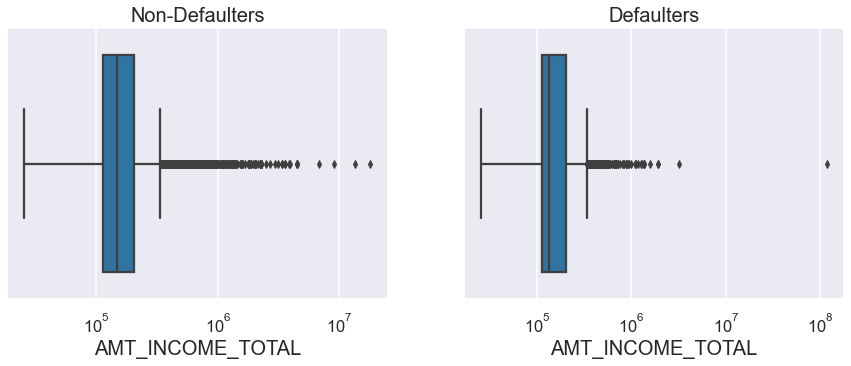

In [87]:
# plotting the column for both target = 0 and target =1
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
numlogplot(target_0_df, "Non-Defaulters", "AMT_INCOME_TOTAL")

plt.subplot(1,2,2)
numlogplot(target_1_df, "Defaulters", "AMT_INCOME_TOTAL")
plt.show()

#### Points of Observation for total income amount
-  There are some outliers for both the Defaulters and non-Defaulters category.
-  There are fewer defaulters who lie in the second quantile.

#### Analysing AMT_ANNUITY

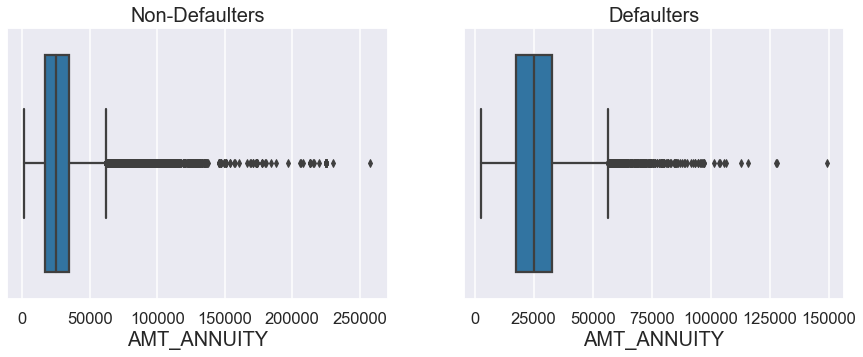

In [88]:
# plotting the column for both target = 0 and target =1
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
numplot(target_0_df, "Non-Defaulters", "AMT_ANNUITY")

plt.subplot(1,2,2)
numplot(target_1_df, "Defaulters", "AMT_ANNUITY")
plt.show()

#### Points of Observation
-  Both the plots have some outliers
-  The Defaulters category have higher number of clients in the 4th quantile.

#### Analysing AMT_CREDIT

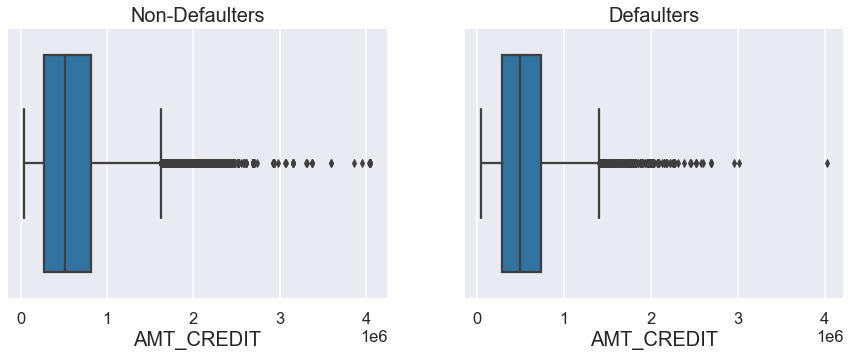

In [89]:
# plotting the column for both target = 0 and target =1
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
numplot(target_0_df, "Non-Defaulters", "AMT_CREDIT")

plt.subplot(1,2,2)
numplot(target_1_df, "Defaulters", "AMT_CREDIT")
plt.show()

#### Points of observation for Credit amount
- There are some outliers which are presented in both the plots.
- The third quantile is larger for the Non-Defaulters.
- Both the categories have maximum clients in the fourth quantile.

# Bivariate Analysis

#### Custom functions

In [90]:
# Custom functions
def catnumplot(data, coln, colc, title):
    fontdict = {'fontsize': 20, 'fontweight': 5}
    sns.boxplot(data=data, y=coln, x=colc)
    plt.title(title, fontdict)
    plt.xlabel(colc, fontdict)
    plt.ylabel(coln, fontdict)
    
def catnumscat(data, coln, colc, title):
    fontdict = {'fontsize': 20, 'fontweight': 5}
    sns.scatterplot(data=data, y=coln, x=colc)
    plt.title(title, fontdict)
    plt.xlabel(colc, fontdict)
    plt.ylabel(coln, fontdict)
    

#### Analysing Credit amount vs Family_status

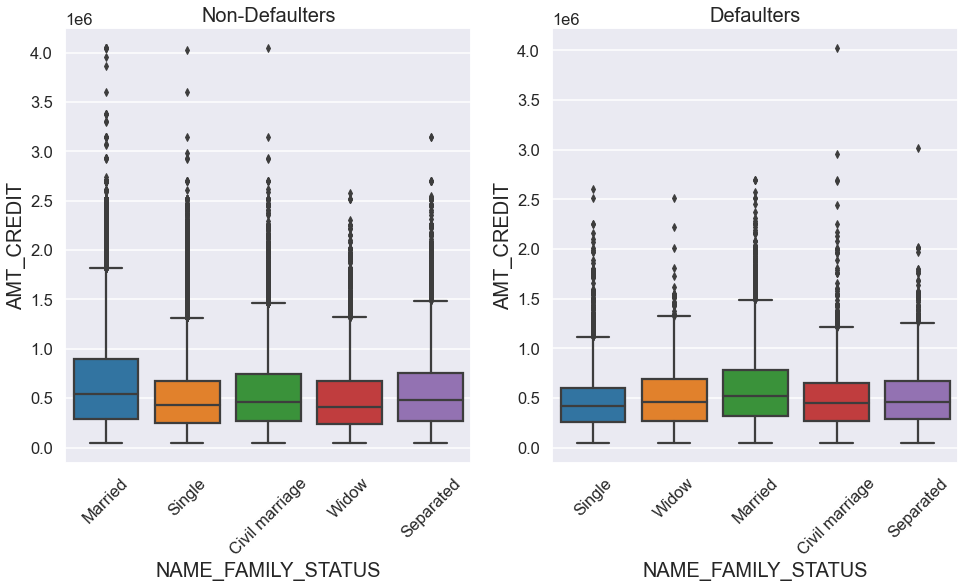

In [91]:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
catnumplot(target_0_df, "AMT_CREDIT", "NAME_FAMILY_STATUS", "Non-Defaulters")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
catnumplot(target_1_df, "AMT_CREDIT", "NAME_FAMILY_STATUS", "Defaulters")
plt.xticks(rotation=45)
plt.show()

#### Observations

-  Both the plots show similar kinds of distribution.
-  Married people have the highest credit in both the categories.
-  In Non-Defaulters category, the married, single, and civil marriage sub-categories have more outliers. 
-  In Defaulters category, the civil marriage and separated sub-categories have more outliers.

#### Analysing AMT_CREDIT vs. OCCUPATION_TYPE

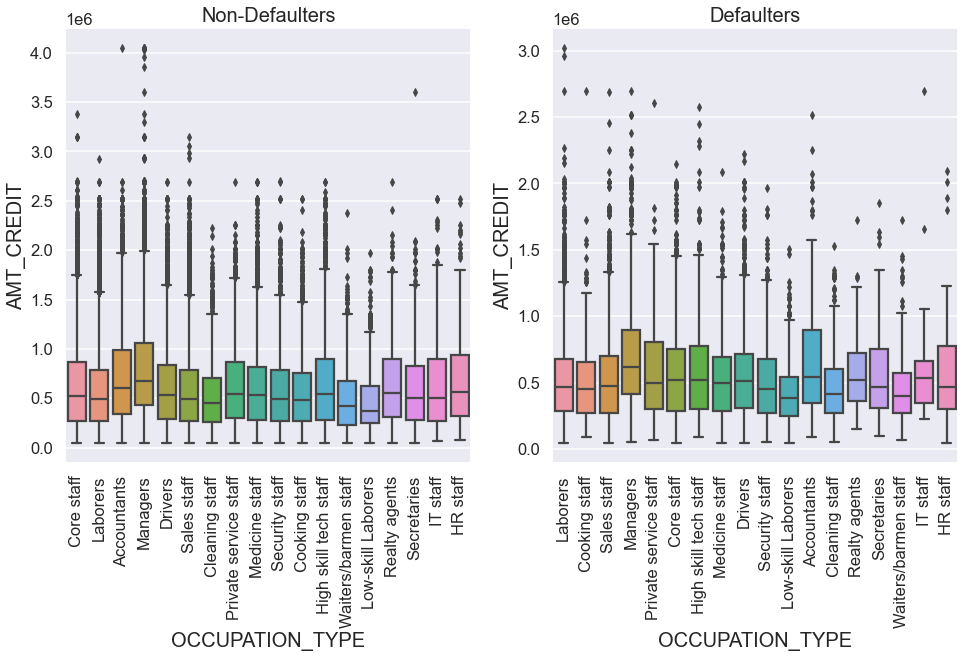

In [92]:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
catnumplot(target_0_df, "AMT_CREDIT", "OCCUPATION_TYPE", "Non-Defaulters")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
catnumplot(target_1_df, "AMT_CREDIT", "OCCUPATION_TYPE", "Defaulters")
plt.xticks(rotation=90)

plt.show()

#### Observations
-  The maximum amount of credit in case of non-defaulters for most of the categories is higher than the maximum amount of credit in the case of defaulters.       
-  There are some outliers in both the cases.
-  Most of the credits are in the third quantile in both the cases.

#### Analysis for AMT_CREDIT vs CNT_FAMILY_MEMBERS

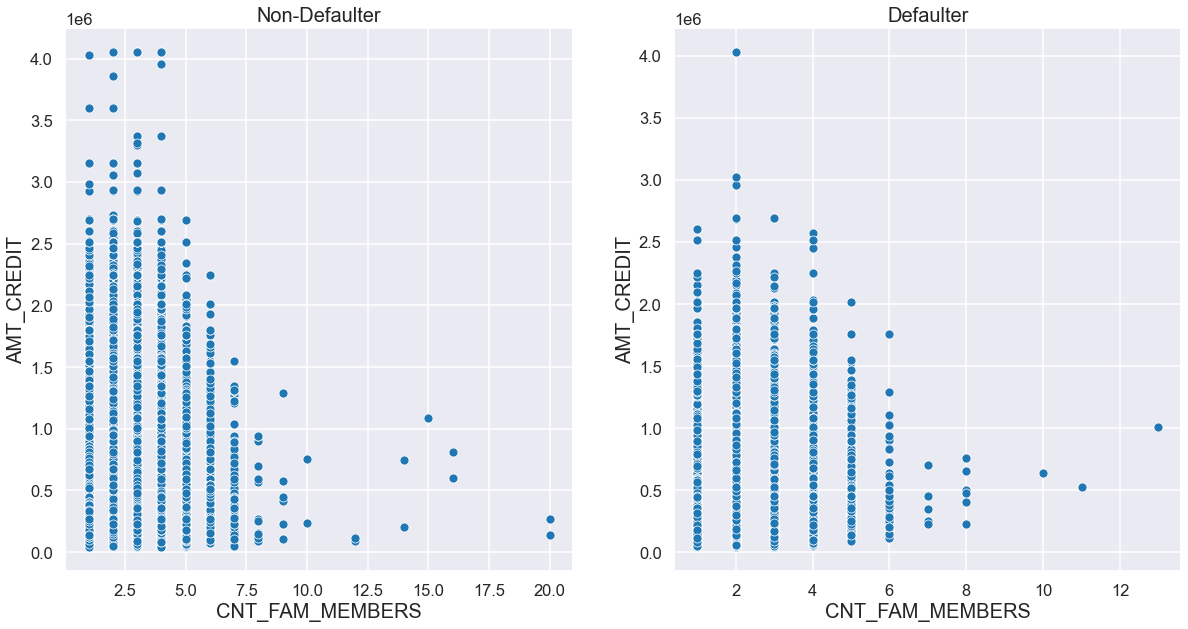

In [93]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
catnumscat(target_0_df, "AMT_CREDIT", "CNT_FAM_MEMBERS", "Non-Defaulter")

plt.subplot(1,2,2)
catnumscat(target_1_df, "AMT_CREDIT", "CNT_FAM_MEMBERS", "Defaulter")
plt.show()

#### Observations

-  The client is equally likely to default if the family is small and credit amount is low.
-  Clients with larger families and high credit amount default less frequently.

#### Analysing AMT_CREDIT vs AMT_GOODS_PRICE

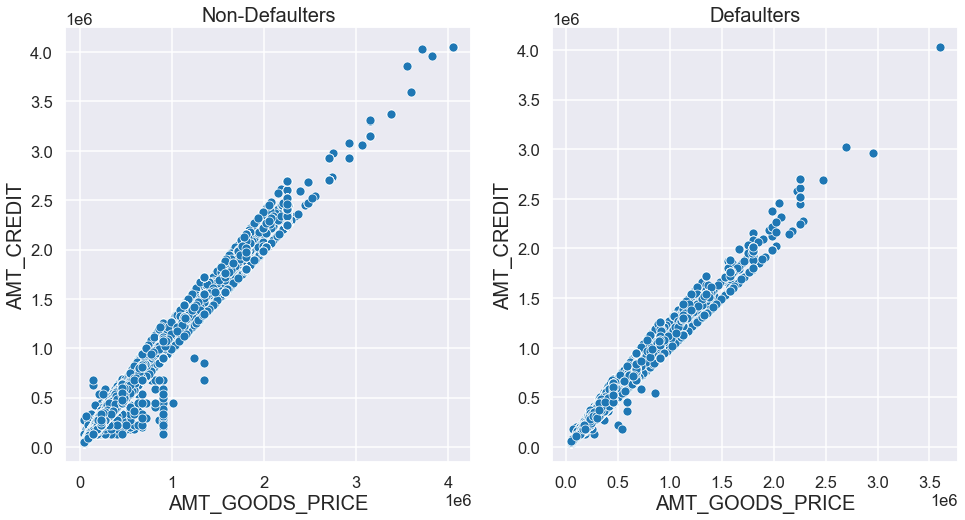

In [94]:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
catnumscat(target_0_df, "AMT_CREDIT", "AMT_GOODS_PRICE", "Non-Defaulters")

plt.subplot(1,2,2)
catnumscat(target_1_df, "AMT_CREDIT", "AMT_GOODS_PRICE", "Defaulters")
plt.show()

#### Observation
-  There is a positive correlation between the amount of credit and the amount of goods price in both the cases.

# Multivariate Analysis

In [95]:
target_0_df.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.001346,0.001744,-0.002790,-0.000519,0.001589,0.000309,-0.000695,0.000556,-0.000741,0.002382
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.336966,-0.245174,0.878571,0.022842,-0.015455,-0.041729,0.014471,-0.002246,0.014137,-0.002172
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349462,-0.062609,-0.140392,0.034256,-0.186573,0.139598,-0.072401,-0.027828,-0.027621,-0.027690,-0.027593
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987250,0.047378,-0.070104,0.064536,-0.103337,0.129140,0.036085,-0.000914,-0.019851,-0.000892,-0.022225
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.776686,-0.012263,-0.104978,0.075787,-0.132128,0.126615,0.028051,-0.013091,-0.022535,-0.012893,-0.023385
AMT_GOODS_PRICE,-0.000205,NaN,-0.000525,0.349462,0.987250,0.776686,1.000000,0.044565,-0.068609,0.062814,-0.104382,0.135694,0.038908,-0.000707,-0.021025,-0.000723,-0.023171
DAYS_BIRTH,0.001346,NaN,-0.336966,-0.062609,0.047378,-0.012263,0.044565,1.000000,0.626114,-0.285825,-0.002332,0.078158,0.197287,-0.007726,0.003057,-0.007316,0.000990
DAYS_EMPLOYED,0.001744,NaN,-0.245174,-0.140392,-0.070104,-0.104978,-0.068609,0.626114,1.000000,-0.238301,0.038328,-0.028530,0.111995,0.007272,0.019379,0.007453,0.016383
CNT_FAM_MEMBERS,-0.002790,NaN,0.878571,0.034256,0.064536,0.075787,0.062814,-0.285825,-0.238301,1.000000,0.027872,-0.000578,-0.026821,0.023526,-0.004046,0.023212,-0.005519


In [96]:
target_1_df.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
SK_ID_CURR,1.000000,NaN,-0.005144,-0.010165,-0.001290,-0.007578,-0.001816,0.001254,-0.005161,-0.003816,-0.005936,0.006452,-0.008178,-0.009395,-0.005549,-0.009058,-0.009428
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.005144,NaN,1.000000,0.004796,-0.001675,0.031257,-0.008112,-0.259109,-0.192864,0.885484,0.040680,-0.012260,-0.020268,0.025804,0.001448,0.025180,-0.005106
AMT_INCOME_TOTAL,-0.010165,NaN,0.004796,1.000000,0.038131,0.046421,0.037583,-0.003096,-0.014977,0.006654,-0.021486,0.007154,-0.015110,-0.004709,-0.005186,-0.004616,-0.004866
AMT_CREDIT,-0.001290,NaN,-0.001675,0.038131,1.000000,0.752195,0.983103,0.135316,0.001930,0.051224,-0.059193,0.120848,0.077698,0.019098,-0.025979,0.019487,-0.030880
AMT_ANNUITY,-0.007578,NaN,0.031257,0.046421,0.752195,1.000000,0.752699,0.014303,-0.081207,0.075711,-0.073784,0.116305,0.041415,0.004463,-0.022394,0.005500,-0.027495
AMT_GOODS_PRICE,-0.001816,NaN,-0.008112,0.037583,0.983103,0.752699,1.000000,0.135810,0.006642,0.047388,-0.066390,0.131184,0.078754,0.019921,-0.021783,0.020385,-0.026179
DAYS_BIRTH,0.001254,NaN,-0.259109,-0.003096,0.135316,0.014303,0.135810,1.000000,0.582185,-0.203267,-0.033928,0.108662,0.171621,0.005164,-0.004946,0.005391,-0.004001
DAYS_EMPLOYED,-0.005161,NaN,-0.192864,-0.014977,0.001930,-0.081207,0.006642,0.582185,1.000000,-0.186515,0.003490,0.001100,0.096229,-0.008019,0.003191,-0.008305,0.005391
CNT_FAM_MEMBERS,-0.003816,NaN,0.885484,0.006654,0.051224,0.075711,0.047388,-0.203267,-0.186515,1.000000,0.043652,0.001883,-0.019884,0.043983,0.007098,0.043308,-0.000777


In [97]:
# custom function
def corrplot(data, title):
    plt.figure(figsize=(20,15))
    fontdict= {'fontsize':20 , 'fontweight': 5}
    plt.title(title, fontdict)
    sns.heatmap(data, cmap="coolwarm", annot=False)

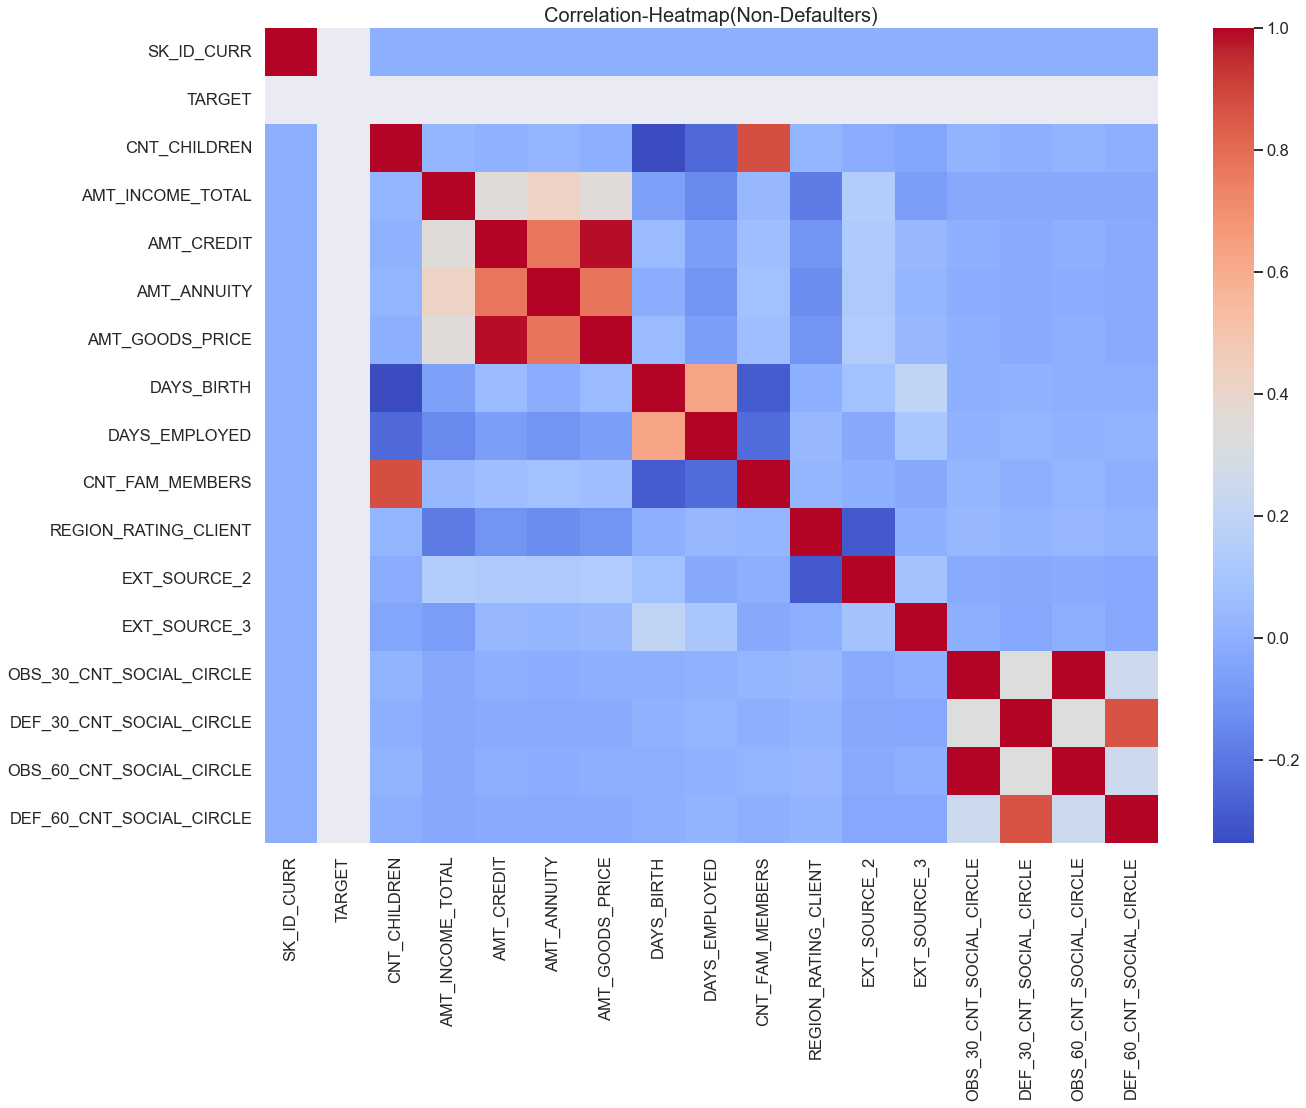

In [98]:
# Heatmap for target-0
corrplot(target_0_df.corr(), "Correlation-Heatmap(Non-Defaulters)")

**Points of observation**
- AMT_CREDIT & AMT_ANNUITY are positively correlated.
- EXT_SOURCE_2 & REGION_RATING_CLIENT are negatively correlated.
- REGION_RATING_CLIENT & INCOME_TOTAL are negatively correlated.

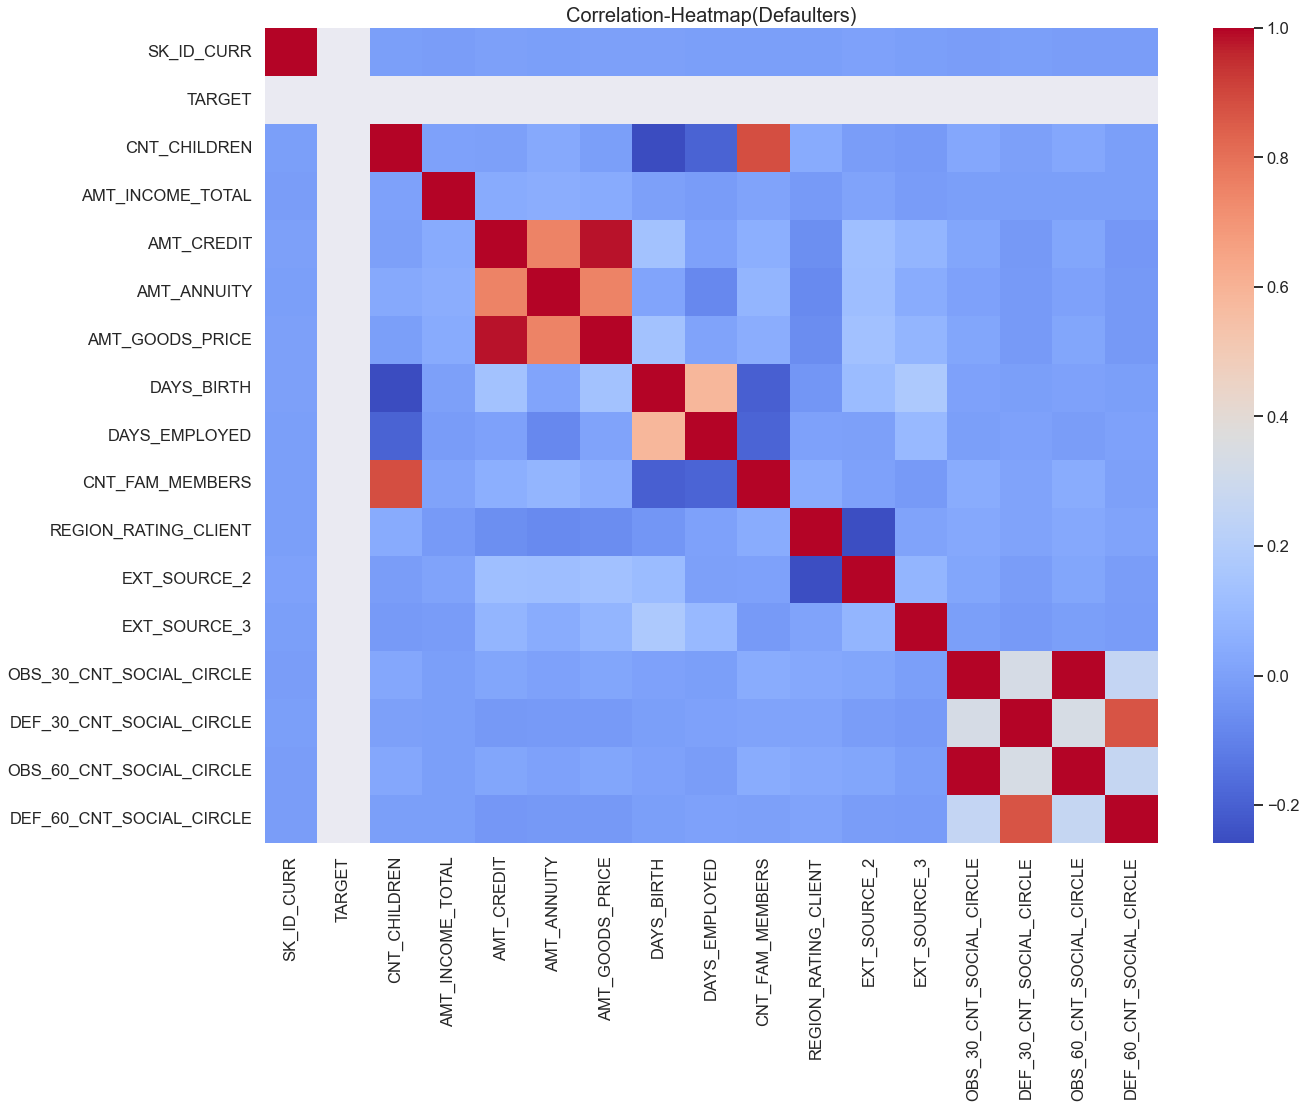

In [99]:
# Heatmap for target-1
corrplot(target_1_df.corr(), "Correlation-Heatmap(Defaulters)")

**Points of observation**
- AMT_CREDIT & AMT_ANNUITY are positively correlated.
- EXT_SOURCE_2 & REGION_RATING_CLIENT are negatively correlated.
- REGION_RATING_CLIENT & INCOME_TOTAL are negatively correlated.

In short, these observation between the two plots are same.

# previous_application.csv - Data Understanding

In [100]:
# creating dataframe using the csv file previous_application.csv
pa_d = pd.read_csv("previous_application.csv")
pa_d.shape  # checking the shape of the data frame.

(1670214, 37)

Clearly, we have 37 columns and 16,70,214 rows in dataset.

In [101]:
pa_d.head() # Taking a look at the first 5 rows of the dataframe.

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# Creating a dataframe that contains all the columns as index along with the corresponding percentage of null values.
cols2 = pd.DataFrame((pa_d.isnull().sum()/pa_d.shape[0])*100)
cols2.columns = ['Percentage_of_nulls']
cols2.head()

,Percentage_of_nulls
SK_ID_PREV,0.000000
SK_ID_CURR,0.000000
NAME_CONTRACT_TYPE,0.000000
AMT_ANNUITY,22.286665
AMT_APPLICATION,0.000000


In [103]:
# Segregating all the columns, containing more than 40 percent of null values.
cols2[cols2.Percentage_of_nulls > 40]

,Percentage_of_nulls
AMT_DOWN_PAYMENT,53.636480
RATE_DOWN_PAYMENT,53.636480
RATE_INTEREST_PRIMARY,99.643698
RATE_INTEREST_PRIVILEGED,99.643698
NAME_TYPE_SUITE,49.119754
DAYS_FIRST_DRAWING,40.298129
DAYS_FIRST_DUE,40.298129
DAYS_LAST_DUE_1ST_VERSION,40.298129
DAYS_LAST_DUE,40.298129
DAYS_TERMINATION,40.298129


In [104]:
# Number of columns containing more than 40 percent of null values.
cols2[cols2.Percentage_of_nulls > 40].shape

(11, 1)

There are 11 such columns in the dataset which contains percentage of null values more than 40 percent.

In [105]:
# Segregating all columns which contain less than 13 percent of null values.
cols2[cols2.Percentage_of_nulls < 13]

,Percentage_of_nulls
SK_ID_PREV,0.000000
SK_ID_CURR,0.000000
NAME_CONTRACT_TYPE,0.000000
AMT_APPLICATION,0.000000
AMT_CREDIT,0.000060
WEEKDAY_APPR_PROCESS_START,0.000000
HOUR_APPR_PROCESS_START,0.000000
FLAG_LAST_APPL_PER_CONTRACT,0.000000
NFLAG_LAST_APPL_IN_DAY,0.000000
NAME_CASH_LOAN_PURPOSE,0.000000


In [106]:
# Number of columns which contain less than 13 percent of null values
cols2[cols2.Percentage_of_nulls < 13].shape

(23, 1)

There are 23 columns which have lesser than 13 percent null values.

In [107]:
# Segregating all the columns with percentage of nulls between 13 and 14 percent.
cols2[(cols2.Percentage_of_nulls >= 13) & (cols2.Percentage_of_nulls <= 40)]

,Percentage_of_nulls
AMT_ANNUITY,22.286665
AMT_GOODS_PRICE,23.081773
CNT_PAYMENT,22.286366


In [108]:
# Number of columns with percentage of nulls in between 13 and 40 percent.
cols2[(cols2.Percentage_of_nulls >= 13) & (cols2.Percentage_of_nulls <= 40)].shape

(3, 1)

There are only 3 such columns which have percentage of nulls in between 13 and 40.

Now, moving on with analysis using the columns with more than 40 percent null values does not make much sense as a large part of data is missing and they do not add value to the analysis.<br>
As a result, I would like to drop them.

In [109]:
# Dropping the columns with more than 40 percent of null values
pa_d.drop(cols2[cols2.Percentage_of_nulls > 40].index, axis=1, inplace=True)

In [110]:
# checking the shape of the dataframe.
pa_d.shape

(1670214, 26)

#### Dropping some columns which do not add much information to our analysis

In [111]:
# listing the columns
pa_d.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [112]:
# dropping the unnecessary columns
pa_d.drop(['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 
           'NFLAG_LAST_APPL_IN_DAY', 'PRODUCT_COMBINATION', 'SELLERPLACE_AREA', 
           'NAME_YIELD_GROUP'], axis = 1, inplace=True)

In [113]:
pa_d.shape

(1670214, 19)

Now, we are left with 19 columns for the analysis in the previous application data

In [114]:
# checking the dataframe
pa_d

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,12.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,XNA,36.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,XAP,Approved,-544,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,Furniture,30.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,XAP,Approved,-1694,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,Furniture,12.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,XAP,Approved,-1488,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,10.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,XNA,Approved,-1185,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),XNA,12.0


Clearly, days decision contains some negative values which should not be the case.

In [115]:
# applying absolute function to the column
pa_d.DAYS_DECISION = pa_d.DAYS_DECISION.apply(lambda x: abs(x))

The values of XNA in the columns are invalid values and thus, should be given missing values treatment.

In [116]:
# defining the function.
valuenull = lambda x: np.nan if x=="XNA" else x

In [117]:
# applying the function
pa_d['NAME_CASH_LOAN_PURPOSE'] = pa_d['NAME_CASH_LOAN_PURPOSE'].apply(valuenull)
pa_d['NAME_PAYMENT_TYPE'] = pa_d['NAME_PAYMENT_TYPE'].apply(valuenull)
pa_d['NAME_GOODS_CATEGORY'] = pa_d['NAME_GOODS_CATEGORY'].apply(valuenull)
pa_d['NAME_PRODUCT_TYPE'] = pa_d['NAME_PRODUCT_TYPE'].apply(valuenull) 
pa_d['NAME_SELLER_INDUSTRY'] = pa_d['NAME_SELLER_INDUSTRY'].apply(valuenull)

In [118]:
# applying the function
pa_d["NAME_CONTRACT_TYPE"] = pa_d["NAME_CONTRACT_TYPE"].apply(valuenull)

In [119]:
# applying the function
pa_d["CODE_REJECT_REASON"] = pa_d["CODE_REJECT_REASON"].apply(valuenull)

## Univariate - CODE_REJECT_REASON

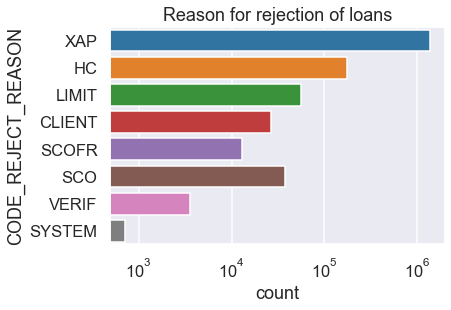

In [120]:
# plotting the CODE_REJECT_REASON column
sns.countplot(data = pa_d, y= "CODE_REJECT_REASON") 
plt.xscale('log')
plt.title("Reason for rejection of loans")
plt.show()


#### Conclusions
-  Most rejections have taken place in the XAP category, followed by Historical Cost.
-  The least rejections have been done by the system.

In [121]:
# Segregating the numerical column list
numcol_list = list(pd.DataFrame(pa_d.describe()).columns)

In [122]:
# listing the numerical columns
numcol_list

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_DECISION',
 'CNT_PAYMENT']

In [123]:
# The columns 'SK_ID_CURR' and 'SK_ID_PREV' are not important for our analysis.
numcol_list.pop(0)
numcol_list.pop(0)
numcol_list.pop(-1)
numcol_list.pop(-1)
numcol_list_modified = numcol_list
numcol_list_modified

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE']

### Pairplot between the numerical column

<Figure size 2160x1080 with 0 Axes>

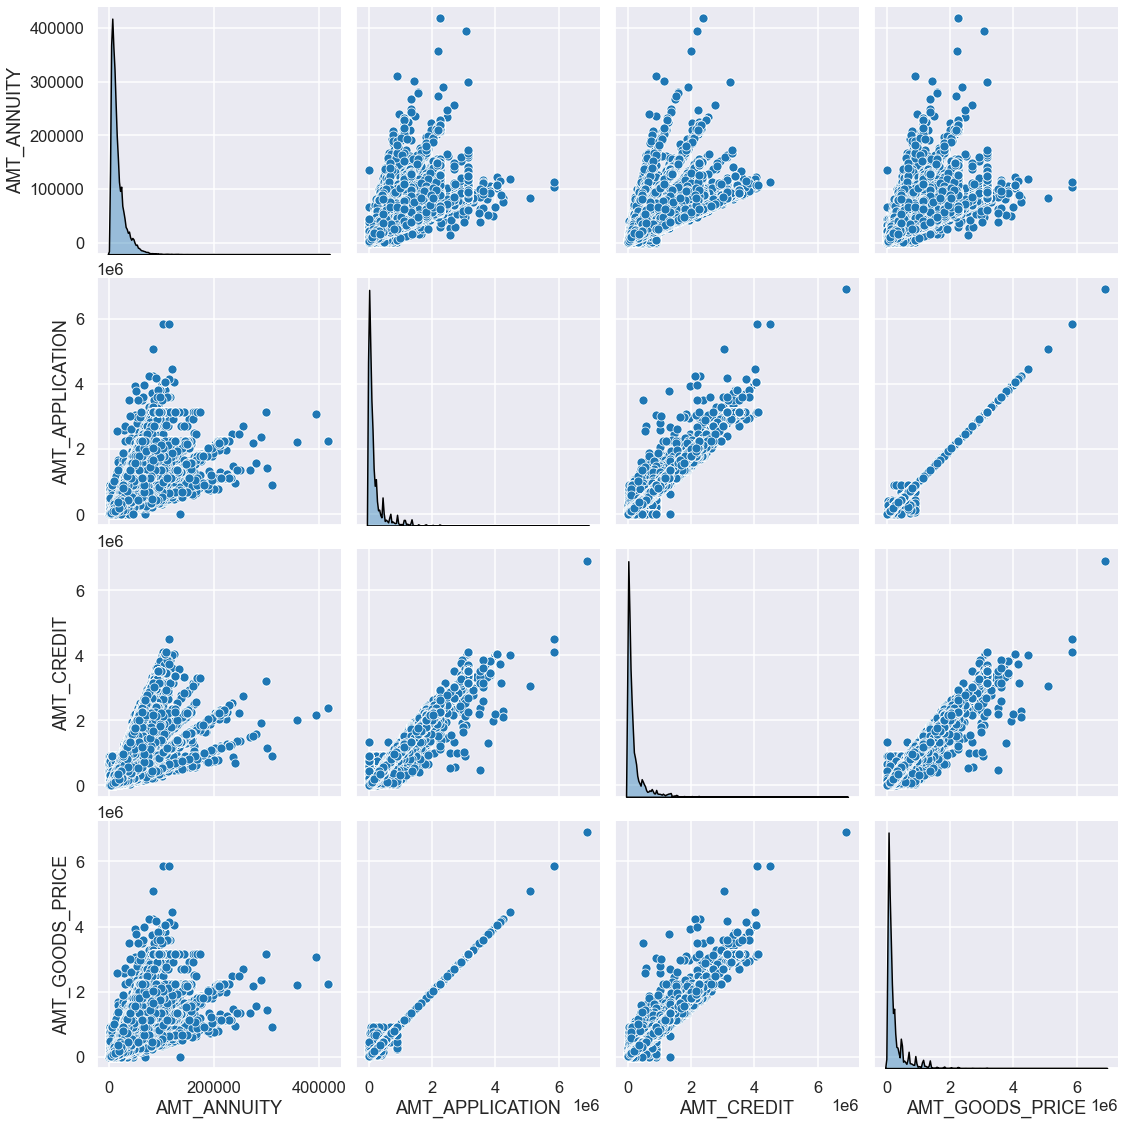

In [124]:
#plotting the pairplot between the numerical variables
plt.figure(figsize=(30, 15))
sns.pairplot(pa_d[numcol_list_modified], diag_kind= 'kde', diag_kws = {'alpha': 0.4, 'edgecolor': 'k'}, size=4)
plt.show()

#### Conclusion
- There is a high positive correlation between the Application amount and the Goods price amount. 
- Annuity has a positive impact on the Goods price, credit amount.  

### Bivariate analysis: NAME_CONTRACT_TYPE vs. AMT_CREDIT

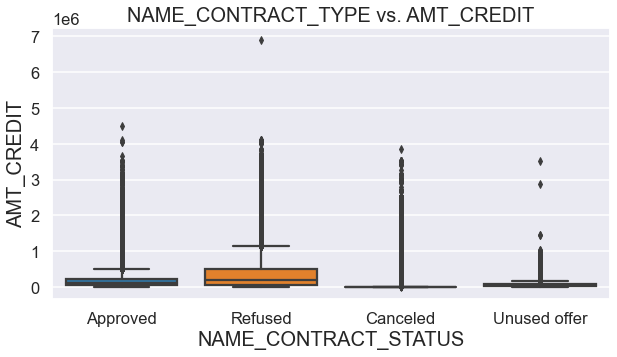

In [125]:
plt.figure(figsize=(10, 5))
catnumplot(pa_d, "AMT_CREDIT", "NAME_CONTRACT_STATUS", "NAME_CONTRACT_TYPE vs. AMT_CREDIT")
plt.show()

#### Conclusion
- When the amount credit is low, either, the contract gets cancelled or the contract becomes an unused offer.

# Merging the two dataset - application_data.csv & previous_data.csv

In [126]:
merged_df = pd.merge(left = ap_d , right = pa_d, how="left", on = "SK_ID_CURR")

In [127]:
merged_df.shape

(1430155, 46)

In [128]:
merged_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_INCOME_GROUPS,AMT_CREDIT_GROUPS,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary,Single,9461,637,Laborers,1.0,2,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,200000-225000,400000-450000,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606.0,NaN,XAP,New,Vehicles,POS,NaN,Stone,Auto technology,24.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,16765,1188,Core staff,2.0,1,School,0.622246,NaN,1.0,0.0,1.0,0.0,250000-275000,1000000 and above,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,NaN,Approved,746.0,NaN,XAP,Repeater,NaN,Cash,x-sell,Credit and cash offices,NaN,12.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,16765,1188,Core staff,2.0,1,School,0.622246,NaN,1.0,0.0,1.0,0.0,250000-275000,1000000 and above,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,NaN,Stone,Furniture,6.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,16765,1188,Core staff,2.0,1,School,0.622246,NaN,1.0,0.0,1.0,0.0,250000-275000,1000000 and above,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,NaN,Country-wide,Consumer electronics,12.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary,Single,19046,225,Laborers,1.0,2,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,50000-75000,0-150000,1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815.0,Cash through the bank,XAP,New,Mobile,POS,NaN,Regional / Local,Connectivity,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430150,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,16856,1262,Laborers,2.0,1,Business Entity Type 3,0.708569,0.113922,0.0,0.0,0.0,0.0,150000-175000,650000-700000,2073384.0,Cash loans,16400.610,229500.0,254340.0,229500.0,NaN,Approved,648.0,Cash through the bank,XAP,Repeater,NaN,Cash,x-sell,Credit and cash offices,NaN,24.0
1430151,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,16856,1262,Laborers,2.0,1,Business Entity Type 3,0.708569,0.113922,0.0,0.0,0.0,0.0,150000-175000,650000-700000,1708056.0,Revolving loans,2250.000,45000.0,45000.0,45000.0,XAP,Refused,456.0,NaN,HC,Repeater,NaN,Cards,walk-in,Country-wide,Connectivity,0.0
1430152,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,16856,1262,Laborers,2.0,1,Business Entity Type 3,0.708569,0.113922,0.0,0.0,0.0,0.0,150000-175000,650000-700000,1296007.0,Cash loans,30737.655,765000.0,1067940.0,765000.0,Repairs,Refused,171.0,Cash through the bank,HC,Repeater,NaN,Cash,walk-in,Credit and cash offices,NaN,60.0
1430153,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,16856,12

In [129]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 46 columns):
 #   Column                    Non-Null Count    Dtype   
---  ------                    --------------    -----   
 0   SK_ID_CURR                1430155 non-null  int64   
 1   TARGET                    1430155 non-null  int64   
 2   NAME_CONTRACT_TYPE_x      1430155 non-null  object  
 3   CODE_GENDER               1430100 non-null  object  
 4   FLAG_OWN_CAR              1430155 non-null  object  
 5   FLAG_OWN_REALTY           1430155 non-null  object  
 6   CNT_CHILDREN              1430155 non-null  int64   
 7   AMT_INCOME_TOTAL          1430155 non-null  float64 
 8   AMT_CREDIT_x              1430155 non-null  float64 
 9   AMT_ANNUITY_x             1430062 non-null  float64 
 10  AMT_GOODS_PRICE_x         1428936 non-null  float64 
 11  NAME_INCOME_TYPE          1430155 non-null  object  
 12  NAME_EDUCATION_TYPE       1430155 non-null  object  
 13  NAME_FAMILY_

#### custom function

In [130]:
def mergeplotcount(data, col, hue, title):
    sns.countplot(data=data, y = col, order = data[col].value_counts().index, hue=hue)
    plt.xscale('log')
    plt.title(title)

#### CASH LOAN PURPOSE 

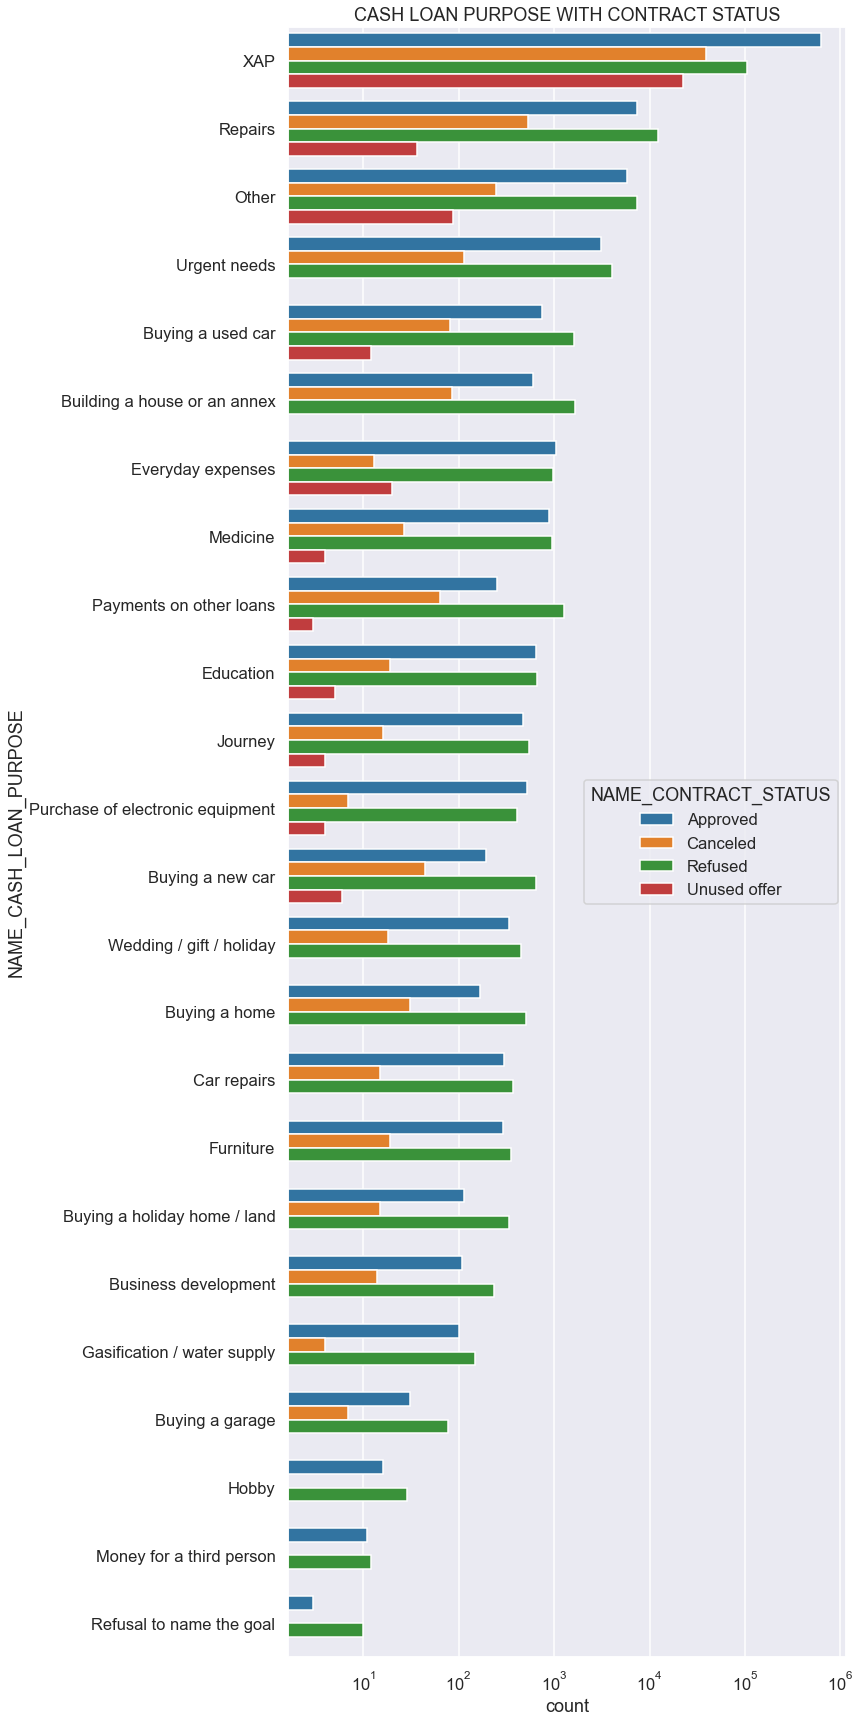

In [131]:
plt.figure(figsize=(10, 30))
mergeplotcount(merged_df, "NAME_CASH_LOAN_PURPOSE", "NAME_CONTRACT_STATUS", "CASH LOAN PURPOSE WITH CONTRACT STATUS")
plt.show()

#### Conclusions
-  XAP category has the highest number of approved loans.
-  There are no cancelled loans in case of Hobby, money for a third person category and refusal to name the goal category. Further, in these categories there are more refused loans than approved loans.


### Bivariate Analysis - Previous credit amount vs. NAME_CASH_LOAN_PURPOSE

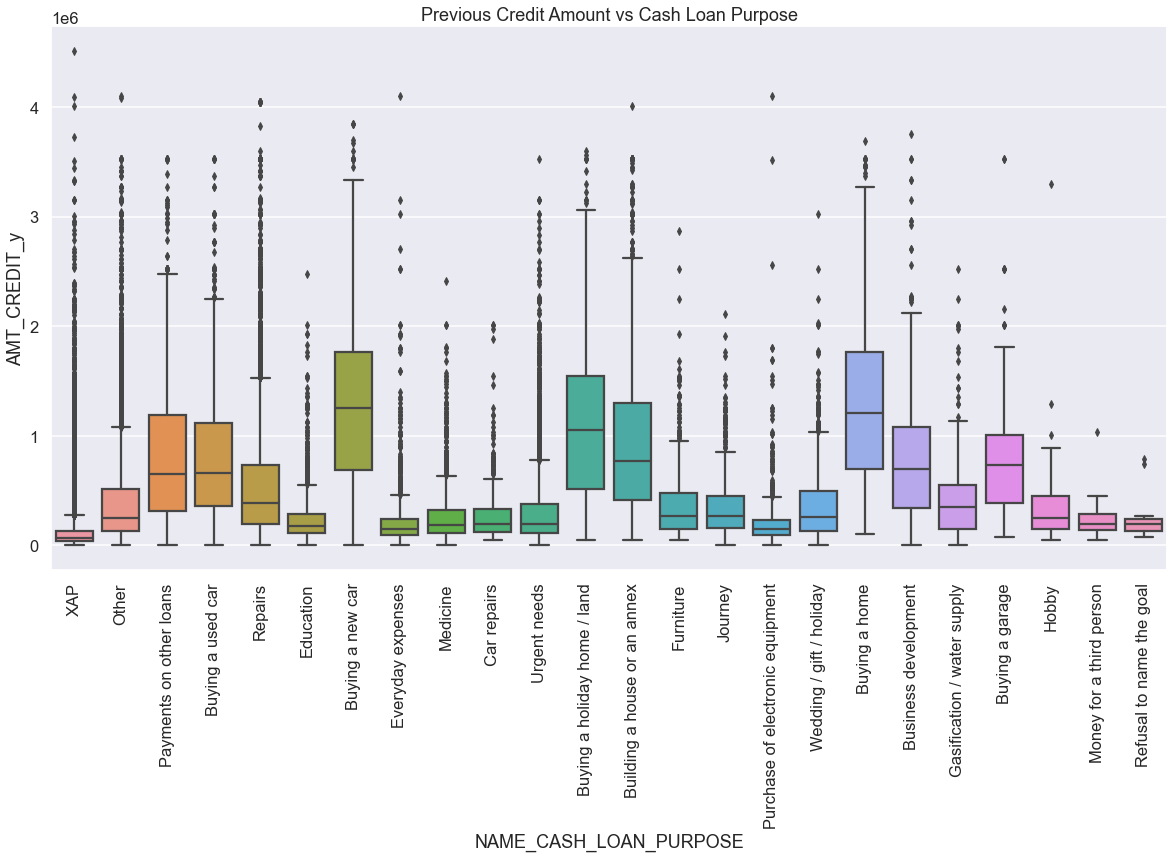

In [132]:
plt.figure(figsize=(20, 10))
sns.boxplot(data = merged_df, x="NAME_CASH_LOAN_PURPOSE", y = "AMT_CREDIT_y")
plt.title("Previous Credit Amount vs Cash Loan Purpose")
plt.xticks(rotation=90)
plt.show()

#### Conclusion
-   'Buying a home','Buying a land','Buying a new car' and'Building a house' have higher credit amount.
-   Money for third person or a Hobby is having less applied for.

#### Bivariate Analysis - Previous Credit amount vs. Family Status

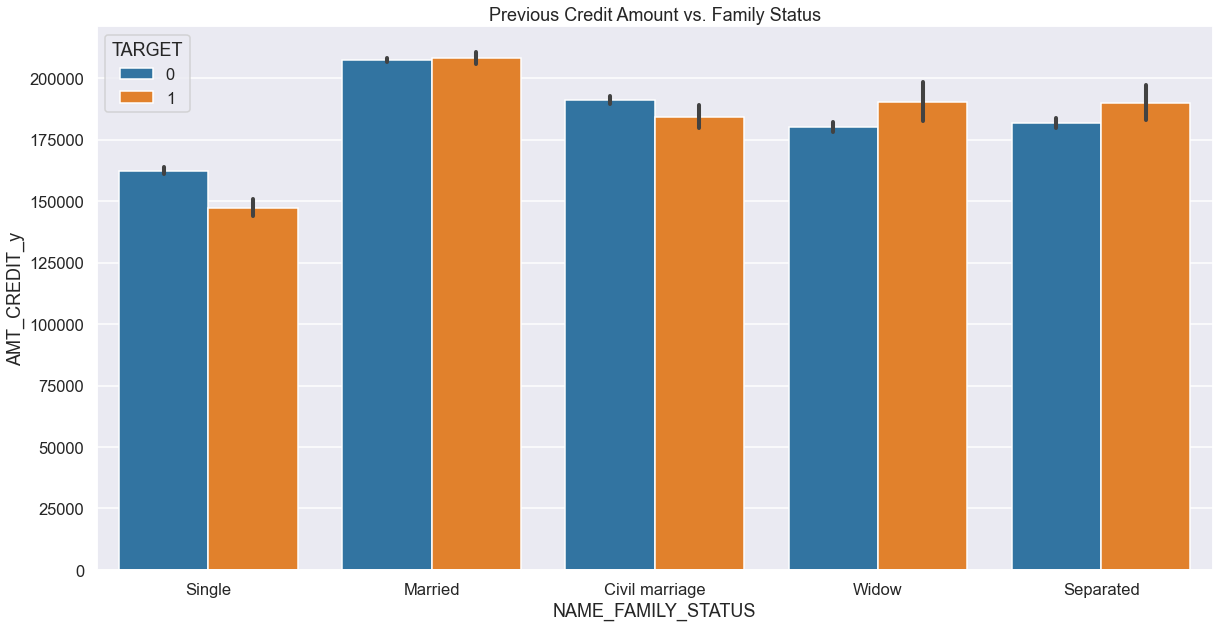

In [133]:
plt.figure(figsize=(20, 10))
sns.barplot(data=merged_df, x="NAME_FAMILY_STATUS", y="AMT_CREDIT_y", hue="TARGET")
plt.title("Previous Credit Amount vs. Family Status")
plt.show()

#### Conclusions
-  Married people apply for higher credit amount in case of Target 0 as well as Target 1.
-  For the categories of Single and Civil marriage, the credit amount is higher in case of Target 0 than Target 1. Banks can focus more on them.
-  For the categories of Widow and Separated, the credit amount is higher in case of Target 1 than Target 0. Banks should focus lesser on them.

### Final Recommendations

-  ‘Student’ ,’pensioner’ and ‘Businessman’ in general should be focussed more.
-  Banks should focus less on the working income type as they have more unsuccessful payments.
-  Widows and Separated with higher credit amount are likely to default.
-  Those family guys should be contacted more who have a large family size and are seeking high credit amount as they are less likely to default.
-  Banks should avoid giving cash loan for XAP purpose.